<a href="https://colab.research.google.com/github/SandraMangas/AnalliticaDatos_ProyectoSucre/blob/main/Proyecto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Misión 2 - Proyecto de Analítica de Datos
    Integrantes:
          - Omar Rojas Mulett
          - Álvaro Galvis García
          - Luis Alberto Pérez Oviedo
          - Sandra Patricia Mangas Galván

*Bootcamp Análisis de Datos - Talento Tech MinTIC - Julio de 2025*.

Identificación del Problema

En el departamento de Sucre, muchas instituciones educativas presentan limitaciones en su acceso a servicios de conectividad (internet, plataformas digitales, recursos tecnológicos). Estas condiciones podrían estar influyendo en los resultados académicos de los estudiantes, especialmente en pruebas estandarizadas como las Saber 11, que son clave para el ingreso a la educación superior.
¿Existe una correlación significativa entre el nivel de conectividad institucional (acceso a internet y uso de tecnologías) y los puntajes obtenidos en las pruebas Saber 11 en el departamento de Sucre?

## 1. Importar Librerias

In [93]:
import pandas as pd  # Para manipulación y análisis de datos.
import numpy as np # Para operaciones numéricas.
import matplotlib.pyplot as plt # Para crear visualizaciones estáticas.
import seaborn as sns # Para crear gráficos estadísticos.
import requests # Trae datos de un sitio web o API.

### 2.1 Intituciones Educativas

## 2. Cargar Datos

In [94]:
# URL de la API OData
url_institucionesE = "https://www.datos.gov.co/api/odata/v4/j7te-zasu"

# Solicitud a la API
response = requests.get(url_institucionesE) # requests.get() obtiene los datos JSON desde la API.obtiene los datos JSON desde la API.
data_url_institucionesE = response.json()

# Convertir los datos de 'value' a DataFrame legible
df_institucionesE = pd.json_normalize(data_url_institucionesE['value']) # data['value'] accede a la lista de registros reales.

### 2.2 Conectividad

In [95]:
# URL de la API OData
url_conectividad = "https://www.datos.gov.co/api/odata/v4/a2f2-cnws"

# Solicitud a la API
response = requests.get(url_conectividad) # requests.get() obtiene los datos JSON desde la API.obtiene los datos JSON desde la API.
data_url_conectividad = response.json()

# Convertir los datos de 'value' a DataFrame
df_conectividad = pd.json_normalize(data_url_conectividad['value']) # data['value'] accede a la lista de registros reales.

### 2.3 Pruebas Saber 11

#### 2.3.1 Dataset de Datos Abiertos

In [96]:
# URL la API con extensión JSON y límite
url_saber11 = "https://www.datos.gov.co/resource/kgxf-xxbe.json?$limit=50000"

# Solicitud a la API
response = requests.get(url_saber11)
data_url_saber11 = response.json()

# Convertir directamente a DataFrame
df_saber11 = pd.DataFrame(data_url_saber11)

# Nota importante: Si se usa .json, no se requiere .odata ni .api.
# https://www.datos.gov.co/api/odata/v4/kgxf-xxbe

In [97]:
print(df_saber11.columns)

Index(['periodo', 'estu_tipodocumento', 'estu_consecutivo',
       'cole_area_ubicacion', 'cole_bilingue', 'cole_calendario',
       'cole_caracter', 'cole_cod_dane_establecimiento', 'cole_cod_dane_sede',
       'cole_cod_depto_ubicacion', 'cole_cod_mcpio_ubicacion',
       'cole_codigo_icfes', 'cole_depto_ubicacion', 'cole_genero',
       'cole_jornada', 'cole_mcpio_ubicacion', 'cole_naturaleza',
       'cole_nombre_establecimiento', 'cole_nombre_sede',
       'cole_sede_principal', 'estu_cod_depto_presentacion',
       'estu_cod_mcpio_presentacion', 'estu_cod_reside_depto',
       'estu_cod_reside_mcpio', 'estu_depto_presentacion', 'estu_depto_reside',
       'estu_estadoinvestigacion', 'estu_estudiante', 'estu_fechanacimiento',
       'estu_genero', 'estu_mcpio_presentacion', 'estu_mcpio_reside',
       'estu_nacionalidad', 'estu_pais_reside', 'estu_privado_libertad',
       'fami_cuartoshogar', 'fami_educacionmadre', 'fami_educacionpadre',
       'fami_estratovivienda', 'fami_perso

In [98]:
df_saber11["cole_depto_ubicacion"] = df_saber11["cole_depto_ubicacion"].str.strip().str.upper()
# Filtrar solo las filas donde el departamento sea SUCRE
# Asegúrate que el nombre esté escrito exactamente así:
df_saber11_sucre = df_saber11[df_saber11["cole_depto_ubicacion"] == "SUCRE"]

#### 2.3.2 Dataset de Repositorio ICFES

In [99]:
# Cargar el dataset 'PruebasSaber11.csv' desde GitHub.
# Este archivo fue transformado previamente con Power Query: se eliminaron columnas irrelevantes
# y se filtraron los datos del departamento de Sucre.

url_saber11_icfes = "https://raw.githubusercontent.com/SandraMangas/AnalliticaDatos_ProyectoSucre/main/PruebasSaber11.csv"
df_saber11_icfes = pd.read_csv(url_saber11_icfes, encoding='latin1', sep=';')

In [100]:
# Cargar el dataset 'PruebasSaber11.csv' desde GitHub.
# Este archivo fue transformado previamente con Power Query: se eliminaron columnas irrelevantes, se relizó merge con el dataset de conectividad (anexar desde Power Query)
# y se filtraron los datos del departamento de Sucre, se filra solo por sedes rurales,
# Se normaliza los estados de instalación y en operación reemplazando por "SI" y Valores en blanco y en planeación por "NO"

url_saber11_Conectividad = "https://raw.github.com/SandraMangas/AnalliticaDatos_ProyectoSucre/main/PruebasSaber11_Conectividad.csv"
df_saber11_Conectividad = pd.read_csv(url_saber11_icfes, encoding='latin1', sep=';')

## 3. Exploración Inicial

### 3.1 Intituciones Educativas

In [101]:
df_institucionesE.head(20)

,__id,nombre_establecimiento,codigo_dane_sede,nombre_sede,zona
0,row-ey8z~kj7g~u8nv,INST EDUC BUENAVISTA,170110000025,INST EDUC BUENAVISTA,Urbano
1,row-ejkd.f47a~qiua,INST EDUC BUENAVISTA,170110000033,SEDE NUESTRA SEÑORA DEL ROSARIO,Urbano
2,row-inth.2vhr_qrty,INST EDUC BUENAVISTA,170110000041,SEDE SAN FRANCISCO DE ASIS,Urbano
3,row-f5bn.cir7~hizu,INST EDUC BUENAVISTA,170110000050,SEDE MARIA AUXILIADORA,Urbano
4,row-nxx4_bjci-bsqm,INST EDUC SAN JUAN BAUTISTA,170124000001,SEDE ROSA GARCIA,Urbano
5,row-nr9f_qnjr-wzdk,INST EDUC SAN JUAN BAUTISTA,170124000010,SEDE SAN VICENTE FERRER,Urbano
6,row-85zw~z36b_4csg,INST EDUC SAN JUAN BAUTISTA,170124000192,SEDE SANTA TERESITA DEL NIÑO JESUS,Urbano
7,row-k25g-yhmr.4ig3,INST EDUC SAN JUAN BAUTISTA,170124000265,INST EDUC SAN JUAN BAUTISTA,Urbano
8,row-mjvn_sigp-hfb3,I.E. VICTOR ZUBIRIA,170204000053,I.E. VICTOR ZUBIRIA - SEDE PRINCIPAL,Urbano
9,row-876m.pia4~paax,I.E. VICTOR ZUBIRIA,170204000061,SEDE URBANA DE NIÑAS,Urbano


In [102]:
df_institucionesE.tail(20)

,__id,nombre_establecimiento,codigo_dane_sede,nombre_sede,zona
780,row-hjgm-336m-ht5p,I.E. SANTA TERESITA,370820000112,I.E. SANTA TERESITA - SEDE PRINCIPAL,Urbano
781,row-sgc2.ibvg_uwqk,I.E. EL MAMON,270215000297,CANTAGALLO,Rural
782,row-uvnc~2cic.k8zg,I.E. EL MAMON,270215000866,LAS TINAS,Rural
783,row-kfhc.q2u9~4kfq,I.E. EL MAMON,270215001293,RINCON DE LAS FLORES,Rural
784,row-7sbp_gbe4~tzhi,I.E. EL MAMON,470215001110,I.E. EL MAMON - SEDE PRINCIPAL,Rural
785,row-tu6f_3mng-34p4,CENTRO EDUCATIVO LOS COROZOS,270429000847,CENTRO EDUCATIVO SANTISIMA CRUZ DE HUIRA ARRIBA,Rural
786,row-5f2s-9nv3-fwmd,CENTRO EDUCATIVO LOS COROZOS,270429001533,CENTRO EDUCATIVO LA MILAGROSA,Rural
787,row-46ha.spmb.hh38,CENTRO EDUCATIVO LOS COROZOS,270429002220,CENTRO EDUCATIVO SAN JOSE HUIRA ABAJO,Rural
788,row-mfvp~5vnq-z45g,CENTRO EDUCATIVO LOS COROZOS,470429001966,CENTRO EDUCATIVO LOS COROZOS,Rural
789,row-ejjj~gawc~mjqy,I.E. PALO ALTO,170713000879,PITA CAPACHO NO. 2,Rural


In [103]:
df_institucionesE.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   __id                    800 non-null    object
 1   nombre_establecimiento  800 non-null    object
 2   codigo_dane_sede        800 non-null    int64 
 3   nombre_sede             800 non-null    object
 4   zona                    800 non-null    object
dtypes: int64(1), object(4)
memory usage: 31.4+ KB


### 3.2 Conectividad

In [104]:
df_conectividad.head()

,__id,nombre_departamento,nombre_municipio,pdet,nombre_centro_poblado,nombre_sede_educativa,fecha_inicio_de_operaci_n,fin_de_operaci_n_inicial,estado
0,row-x3fv_7fq4.tx3x,SUCRE,MAJAGUAL,NO,CORREG EL NARANJO,INST EDUC EL NARANJO,None,None,INSTALACIÓN
1,row-5rbh.85xj_2mc9,SUCRE,OVEJAS,SI,VEREDA DAMASCO,CENTRO EDUCATIVO DAMASCO,2021-09-25T00:00:00.000,2031-09-25T00:00:00.000,OPERACIÓN
2,row-vpvn_jhri.m68b,SUCRE,OVEJAS,SI,VEREDA VILLA COLOMBIA,CENTRO EDUCATIVO VILLA COLOMBIA,2021-09-25T00:00:00.000,2031-09-25T00:00:00.000,OPERACIÓN
3,row-65em.fubm-dvu4,SUCRE,TOLÚ VIEJO,SI,CORREG DE LAS PIEDRAS,I.E. TÉCNICO AGROPECUARIO DE LAS PIEDRAS - SED...,None,None,INSTALACIÓN
4,row-er2d.32h4.7fje,SUCRE,TOLÚ VIEJO,SI,CORREG LA PALMIRA,INSTITUCION EDUCATIVA PALMIRA,None,None,INSTALACIÓN


In [105]:
df_conectividad.tail()

,__id,nombre_departamento,nombre_municipio,pdet,nombre_centro_poblado,nombre_sede_educativa,fecha_inicio_de_operaci_n,fin_de_operaci_n_inicial,estado
470,row-639p-mi9q_cjp7,SUCRE,GUARANDA,NO,VDA. LAS MERCEDES,LAS MERCEDES,None,None,EN PLANEACIÓN
471,row-ium6~g7ec.8qki,SUCRE,GUARANDA,NO,VDA. PUEBLO NUEVO,PUEBLO NUEVO,None,None,INSTALACIÓN
472,row-hsbd_3sav~txc2,SUCRE,CHALÁN,SI,DESBARRANCADO,LOS COMUNEROS,None,None,EN PLANEACIÓN
473,row-bu3d.kbb2_jegg,SUCRE,COROZAL,NO,VEREDA LA LOMA,LA LOMA,None,None,INSTALACIÓN
474,row-ffu2.rtx6~vzda,SUCRE,COLOSÓ,SI,CORREG CEIBA,CEIBA,2022-01-01T00:00:00.000,2032-01-01T00:00:00.000,OPERACIÓN


In [106]:
df_conectividad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 475 entries, 0 to 474
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   __id                       475 non-null    object
 1   nombre_departamento        475 non-null    object
 2   nombre_municipio           475 non-null    object
 3   pdet                       475 non-null    object
 4   nombre_centro_poblado      475 non-null    object
 5   nombre_sede_educativa      475 non-null    object
 6   fecha_inicio_de_operaci_n  179 non-null    object
 7   fin_de_operaci_n_inicial   179 non-null    object
 8   estado                     475 non-null    object
dtypes: object(9)
memory usage: 33.5+ KB


### 3.3 Saber 11

#### 3.3.1 Dataset de Datos Abiertos

In [107]:
df_saber11.head()

,periodo,estu_tipodocumento,estu_consecutivo,cole_area_ubicacion,cole_bilingue,cole_calendario,cole_caracter,cole_cod_dane_establecimiento,cole_cod_dane_sede,cole_cod_depto_ubicacion,...,fami_tienecomputador,fami_tieneinternet,fami_tienelavadora,desemp_ingles,punt_ingles,punt_matematicas,punt_sociales_ciudadanas,punt_c_naturales,punt_lectura_critica,punt_global
0,20131,CR,SB11201310000414,URBANO,N,B,ACADÉMICO,311848000812,311848000812,11,...,Si,Si,Si,B+,94,88,NaN,NaN,NaN,NaN
1,20194,TI,SB11201940464873,RURAL,N,A,TÉCNICO/ACADÉMICO,141016000305,241016000342,41,...,Si,Si,Si,B1,71,66,70,65,69,339
2,20194,TI,SB11201940464873,RURAL,N,A,TÉCNICO/ACADÉMICO,141016000305,241016000342,41,...,Si,Si,Si,B1,71,66,70,65,69,339
3,20122,TI,SB11201220204399,URBANO,N,A,TÉCNICO/ACADÉMICO,163130000718,163130000718,63,...,Si,Si,No,A1,48,45,NaN,NaN,NaN,NaN
4,20132,TI,SB11201320464198,URBANO,N,A,TÉCNICO,119001000559,119001000559,19,...,Si,Si,Si,A-,43,52,NaN,NaN,NaN,NaN


In [108]:
df_saber11.tail()

,periodo,estu_tipodocumento,estu_consecutivo,cole_area_ubicacion,cole_bilingue,cole_calendario,cole_caracter,cole_cod_dane_establecimiento,cole_cod_dane_sede,cole_cod_depto_ubicacion,...,fami_tienecomputador,fami_tieneinternet,fami_tienelavadora,desemp_ingles,punt_ingles,punt_matematicas,punt_sociales_ciudadanas,punt_c_naturales,punt_lectura_critica,punt_global
49995,20194,TI,SB11201940623464,RURAL,NaN,A,NaN,418001800021,418001800021,18,...,Si,Si,Si,A-,47,45,45,45,54,236
49996,20132,TI,SB11201320493041,URBANO,NaN,A,ACADÉMICO,373411002242,373411002242,73,...,Si,No,Si,A1,51,49,NaN,NaN,NaN,NaN
49997,20112,TI,SB11201120318868,URBANO,N,A,ACADÉMICO,311001011800,311001011800,11,...,Si,Si,Si,A1,49,52,NaN,NaN,NaN,NaN
49998,20131,TI,SB11201310079267,URBANO,N,A,TÉCNICO/ACADÉMICO,386568061015,386568061015,86,...,No,No,No,A-,27,44,NaN,NaN,NaN,NaN
49999,20132,TI,SB11201320070946,URBANO,N,A,ACADÉMICO,115001000057,115001000057,15,...,No,No,No,A2,59,74,NaN,NaN,NaN,NaN


In [109]:
df_saber11.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 51 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   periodo                        50000 non-null  object
 1   estu_tipodocumento             50000 non-null  object
 2   estu_consecutivo               50000 non-null  object
 3   cole_area_ubicacion            49977 non-null  object
 4   cole_bilingue                  44133 non-null  object
 5   cole_calendario                49987 non-null  object
 6   cole_caracter                  49460 non-null  object
 7   cole_cod_dane_establecimiento  49977 non-null  object
 8   cole_cod_dane_sede             49997 non-null  object
 9   cole_cod_depto_ubicacion       49998 non-null  object
 10  cole_cod_mcpio_ubicacion       49998 non-null  object
 11  cole_codigo_icfes              49809 non-null  object
 12  cole_depto_ubicacion           49998 non-null  object
 13  c

In [110]:
df_saber11_sucre.info()

<class 'pandas.core.frame.DataFrame'>
Index: 907 entries, 21 to 49925
Data columns (total 51 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   periodo                        907 non-null    object
 1   estu_tipodocumento             907 non-null    object
 2   estu_consecutivo               907 non-null    object
 3   cole_area_ubicacion            907 non-null    object
 4   cole_bilingue                  778 non-null    object
 5   cole_calendario                907 non-null    object
 6   cole_caracter                  906 non-null    object
 7   cole_cod_dane_establecimiento  907 non-null    object
 8   cole_cod_dane_sede             907 non-null    object
 9   cole_cod_depto_ubicacion       907 non-null    object
 10  cole_cod_mcpio_ubicacion       907 non-null    object
 11  cole_codigo_icfes              905 non-null    object
 12  cole_depto_ubicacion           907 non-null    object
 13  cole_ge

### 3.3.2 Dataset de Repositorio ICFES

In [111]:
df_saber11_icfes.head()

,periodo,cole_area_ubicacion,cole_cod_dane_establecimiento,cole_cod_dane_sede,cole_depto_ubicacion,cole_jornada,cole_mcpio_ubicacion,cole_naturaleza,cole_nombre_establecimiento,cole_nombre_sede,...,estu_depto_presentacion,estu_depto_reside,estu_mcpio_presentacion,estu_mcpio_reside,punt_c_naturales,punt_global,punt_ingles,punt_lectura_critica,punt_matematicas,punt_sociales_ciudadanas
0,20241,URBANO,370670800018,370670800018,SUCRE,SABATINA,SAMPUÉS,NO OFICIAL,INSTITUCION EDUCATIVA GIMNASIO PEDAGOGICO SAMP...,INSTITUCION EDUCATIVA GIMNASIO PEDAGOGICO SAMP...,...,SUCRE,SUCRE,SINCELEJO,SAMPUÉS,39,202,39.0,43,36,44
1,20241,URBANO,370670800018,370670800018,SUCRE,SABATINA,SAMPUÉS,NO OFICIAL,INSTITUCION EDUCATIVA GIMNASIO PEDAGOGICO SAMP...,INSTITUCION EDUCATIVA GIMNASIO PEDAGOGICO SAMP...,...,SUCRE,SUCRE,SINCELEJO,SAMPUÉS,42,232,52.0,56,49,37
2,20241,URBANO,370670800018,370670800018,SUCRE,SABATINA,SAMPUÉS,NO OFICIAL,INSTITUCION EDUCATIVA GIMNASIO PEDAGOGICO SAMP...,INSTITUCION EDUCATIVA GIMNASIO PEDAGOGICO SAMP...,...,SUCRE,SUCRE,SINCELEJO,SAMPUÉS,44,206,32.0,47,36,41
3,20241,URBANO,370670800018,370670800018,SUCRE,SABATINA,SAMPUÉS,NO OFICIAL,INSTITUCION EDUCATIVA GIMNASIO PEDAGOGICO SAMP...,INSTITUCION EDUCATIVA GIMNASIO PEDAGOGICO SAMP...,...,SUCRE,SUCRE,SINCELEJO,SAMPUÉS,33,177,31.0,37,41,32
4,20241,URBANO,370670800018,370670800018,SUCRE,SABATINA,SAMPUÉS,NO OFICIAL,INSTITUCION EDUCATIVA GIMNASIO PEDAGOGICO SAMP...,INSTITUCION EDUCATIVA GIMNASIO PEDAGOGICO SAMP...,...,SUCRE,SUCRE,SINCELEJO,SAMPUÉS,35,186,45.0,42,41,28


In [112]:
df_saber11_icfes.tail()

,periodo,cole_area_ubicacion,cole_cod_dane_establecimiento,cole_cod_dane_sede,cole_depto_ubicacion,cole_jornada,cole_mcpio_ubicacion,cole_naturaleza,cole_nombre_establecimiento,cole_nombre_sede,...,estu_depto_presentacion,estu_depto_reside,estu_mcpio_presentacion,estu_mcpio_reside,punt_c_naturales,punt_global,punt_ingles,punt_lectura_critica,punt_matematicas,punt_sociales_ciudadanas
11774,20242,RURAL,270678000580,270678000580,SUCRE,MAÑANA,GALERAS,OFICIAL,INST EDUC PUERTO FRANCO,INST EDUC PUERTO FRANCO,...,SUCRE,SUCRE,GALERAS,GALERAS,45,206,26.0,41,39,45
11775,20242,RURAL,270702000120,270702000120,SUCRE,MAÑANA,SAN JUAN DE BETULIA,OFICIAL,I.E. SABANETA,I.E. SABANETA - SEDE PRINCIPAL,...,SUCRE,SUCRE,COROZAL,SAN JUAN DE BETULIA,49,229,52.0,48,39,45
11776,20242,URBANO,170717000016,170717000016,SUCRE,MAÑANA,SAN PEDRO,OFICIAL,INST EDUC SAN PEDRO CLAVER,INST EDUC SAN PEDRO CLAVER,...,SUCRE,SUCRE,SAN PEDRO,SAN PEDRO,49,229,52.0,54,45,33
11777,20242,URBANO,170215000977,170215000977,SUCRE,TARDE,COROZAL,OFICIAL,I.E. NORMAL SUPERIOR DE COROZAL,I.E. NORMAL SUPERIOR DE COROZAL - SEDE PRINCIPAL,...,SUCRE,SUCRE,COROZAL,COROZAL,58,279,54.0,59,56,51
11778,20242,URBANO,170204000053,170204000053,SUCRE,MAÑANA,COLOSÓ,OFICIAL,I.E. VICTOR ZUBIRIA,I.E. VICTOR ZUBIRIA - SEDE PRINCIPAL,...,SUCRE,SUCRE,SINCELEJO,COLOSÓ,61,328,57.0,63,68,73


In [113]:
df_saber11_icfes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11779 entries, 0 to 11778
Data columns (total 27 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   periodo                        11779 non-null  int64  
 1   cole_area_ubicacion            11779 non-null  object 
 2   cole_cod_dane_establecimiento  11779 non-null  int64  
 3   cole_cod_dane_sede             11779 non-null  int64  
 4   cole_depto_ubicacion           11779 non-null  object 
 5   cole_jornada                   11779 non-null  object 
 6   cole_mcpio_ubicacion           11779 non-null  object 
 7   cole_naturaleza                11779 non-null  object 
 8   cole_nombre_establecimiento    11779 non-null  object 
 9   cole_nombre_sede               11779 non-null  object 
 10  desemp_c_naturales             11779 non-null  int64  
 11  desemp_ingles                  11696 non-null  object 
 12  desemp_lectura_critica         11779 non-null 

## 4. Calidad del Dataset

### 4.1 Intituciones Educativas

In [114]:
# Cantidad de datos nulos
df_institucionesE.isnull().sum()

,0
__id,0
nombre_establecimiento,0
codigo_dane_sede,0
nombre_sede,0
zona,0


In [115]:
# Porcentaje de datos nulos
print('Porcentaje datos nulos')
df_institucionesE.isnull().mean()*100

Porcentaje datos nulos


,0
__id,0.0
nombre_establecimiento,0.0
codigo_dane_sede,0.0
nombre_sede,0.0
zona,0.0


In [116]:
# Porcentaje de datos no nulos
print('Porcentaje datos no nulos')
(1-df_institucionesE.isnull().mean())*100

Porcentaje datos no nulos


,0
__id,100.0
nombre_establecimiento,100.0
codigo_dane_sede,100.0
nombre_sede,100.0
zona,100.0


In [117]:
total_datos_institucionesE=df_institucionesE.shape[0]*df_institucionesE.shape[1]
total_nulos_institucionesE=df_institucionesE.isnull().sum().sum()
print('Porcentaje datos nulo en el dataset',(total_nulos_institucionesE/total_datos_institucionesE)*100)

Porcentaje datos nulo en el dataset 0.0


In [118]:
print('Porcentaje completitud del dataset', (1-total_nulos_institucionesE/total_datos_institucionesE)*100)

Porcentaje completitud del dataset 100.0


### 4.2 Conectividad

In [119]:
# Cantidad de datos nulos
df_conectividad.isnull().sum()

,0
__id,0
nombre_departamento,0
nombre_municipio,0
pdet,0
nombre_centro_poblado,0
nombre_sede_educativa,0
fecha_inicio_de_operaci_n,296
fin_de_operaci_n_inicial,296
estado,0


In [120]:
# Porcentaje de datos nulos
print('Porcentaje datos nulos')
df_conectividad.isnull().mean()*100

Porcentaje datos nulos


,0
__id,0.000000
nombre_departamento,0.000000
nombre_municipio,0.000000
pdet,0.000000
nombre_centro_poblado,0.000000
nombre_sede_educativa,0.000000
fecha_inicio_de_operaci_n,62.315789
fin_de_operaci_n_inicial,62.315789
estado,0.000000


In [121]:
# Porcentaje de datos no nulos
print('Porcentaje datos no nulos')
(1-df_conectividad.isnull().mean())*100

Porcentaje datos no nulos


,0
__id,100.000000
nombre_departamento,100.000000
nombre_municipio,100.000000
pdet,100.000000
nombre_centro_poblado,100.000000
nombre_sede_educativa,100.000000
fecha_inicio_de_operaci_n,37.684211
fin_de_operaci_n_inicial,37.684211
estado,100.000000


In [122]:
total_datos_conectividad=df_conectividad.shape[0]*df_conectividad.shape[1]
total_nulos_conectividad=df_conectividad.isnull().sum().sum()
print('Porcentaje datos nulo en el dataset',(total_nulos_conectividad/total_datos_conectividad)*100)

Porcentaje datos nulo en el dataset 13.84795321637427


In [123]:
print('Porcentaje completitud del dataset', (1-total_nulos_conectividad/total_datos_conectividad)*100)

Porcentaje completitud del dataset 86.15204678362574


### 4.3 Pruebas Saber 11

#### 4.3.1 Dataset de Datos Abiertos

In [124]:
# Cantidad de datos nulos
df_saber11.isnull().sum()

,0
periodo,0
estu_tipodocumento,0
estu_consecutivo,0
cole_area_ubicacion,23
cole_bilingue,5867
cole_calendario,13
cole_caracter,540
cole_cod_dane_establecimiento,23
cole_cod_dane_sede,3
cole_cod_depto_ubicacion,2


In [125]:
df_saber11_sucre.isnull().sum()

,0
periodo,0
estu_tipodocumento,0
estu_consecutivo,0
cole_area_ubicacion,0
cole_bilingue,129
cole_calendario,0
cole_caracter,1
cole_cod_dane_establecimiento,0
cole_cod_dane_sede,0
cole_cod_depto_ubicacion,0


In [126]:
# Porcentaje de datos nulos
print('Porcentaje datos nulos')
df_saber11.isnull().mean()*100

Porcentaje datos nulos


,0
periodo,0.000
estu_tipodocumento,0.000
estu_consecutivo,0.000
cole_area_ubicacion,0.046
cole_bilingue,11.734
cole_calendario,0.026
cole_caracter,1.080
cole_cod_dane_establecimiento,0.046
cole_cod_dane_sede,0.006
cole_cod_depto_ubicacion,0.004


In [127]:
# Porcentaje de datos nulos
print('Porcentaje datos nulos')
df_saber11_sucre.isnull().mean()*100

Porcentaje datos nulos


,0
periodo,0.000000
estu_tipodocumento,0.000000
estu_consecutivo,0.000000
cole_area_ubicacion,0.000000
cole_bilingue,14.222712
cole_calendario,0.000000
cole_caracter,0.110254
cole_cod_dane_establecimiento,0.000000
cole_cod_dane_sede,0.000000
cole_cod_depto_ubicacion,0.000000


In [128]:
# Porcentaje de datos no nulos
print('Porcentaje datos no nulos')
(1-df_saber11.isnull().mean())*100

Porcentaje datos no nulos


,0
periodo,100.000
estu_tipodocumento,100.000
estu_consecutivo,100.000
cole_area_ubicacion,99.954
cole_bilingue,88.266
cole_calendario,99.974
cole_caracter,98.920
cole_cod_dane_establecimiento,99.954
cole_cod_dane_sede,99.994
cole_cod_depto_ubicacion,99.996


In [129]:
# Porcentaje de datos no nulos
print('Porcentaje datos no nulos')
(1-df_saber11_sucre.isnull().mean())*100

Porcentaje datos no nulos


,0
periodo,100.000000
estu_tipodocumento,100.000000
estu_consecutivo,100.000000
cole_area_ubicacion,100.000000
cole_bilingue,85.777288
cole_calendario,100.000000
cole_caracter,99.889746
cole_cod_dane_establecimiento,100.000000
cole_cod_dane_sede,100.000000
cole_cod_depto_ubicacion,100.000000


In [130]:
total_datos_saber11=df_saber11.shape[0]*df_saber11.shape[1]
total_nulos_saber11=df_saber11.isnull().sum().sum()
print('Porcentaje datos nulo en el dataset',(total_nulos_saber11/total_datos_saber11)*100)

Porcentaje datos nulo en el dataset 4.016117647058824


In [131]:
total_datos_saber11_sucre=df_saber11_sucre.shape[0]*df_saber11_sucre.shape[1]
total_nulos_saber11_sucre=df_saber11_sucre.isnull().sum().sum()
print('Porcentaje datos nulo en el dataset',(total_nulos_saber11_sucre/total_datos_saber11_sucre)*100)

Porcentaje datos nulo en el dataset 3.97345266662343


In [132]:
print('Porcentaje completitud del dataset', (1-total_nulos_saber11/total_datos_saber11)*100)

Porcentaje completitud del dataset 95.98388235294118


In [133]:
print('Porcentaje completitud del dataset', (1-total_nulos_saber11_sucre/total_datos_saber11_sucre)*100)

Porcentaje completitud del dataset 96.02654733337657


#### 4.3.2 Dataset de Repositorio ICFES

In [134]:
# Cantidad de datos nulos
df_saber11_icfes.isnull().sum()

,0
periodo,0
cole_area_ubicacion,0
cole_cod_dane_establecimiento,0
cole_cod_dane_sede,0
cole_depto_ubicacion,0
cole_jornada,0
cole_mcpio_ubicacion,0
cole_naturaleza,0
cole_nombre_establecimiento,0
cole_nombre_sede,0


In [135]:
# Porcentaje de datos nulos
print('Porcentaje datos nulos')
df_saber11_icfes.isnull().mean()*100

Porcentaje datos nulos


,0
periodo,0.000000
cole_area_ubicacion,0.000000
cole_cod_dane_establecimiento,0.000000
cole_cod_dane_sede,0.000000
cole_depto_ubicacion,0.000000
cole_jornada,0.000000
cole_mcpio_ubicacion,0.000000
cole_naturaleza,0.000000
cole_nombre_establecimiento,0.000000
cole_nombre_sede,0.000000


In [136]:
# Porcentaje de datos no nulos
print('Porcentaje datos no nulos')
(1-df_saber11_icfes.isnull().mean())*100

Porcentaje datos no nulos


,0
periodo,100.000000
cole_area_ubicacion,100.000000
cole_cod_dane_establecimiento,100.000000
cole_cod_dane_sede,100.000000
cole_depto_ubicacion,100.000000
cole_jornada,100.000000
cole_mcpio_ubicacion,100.000000
cole_naturaleza,100.000000
cole_nombre_establecimiento,100.000000
cole_nombre_sede,100.000000


In [137]:
total_datos_saber11_icfes=df_saber11_icfes.shape[0]*df_saber11_icfes.shape[1]
total_nulos_df_saber11_icfes=df_saber11_icfes.isnull().sum().sum()
print('Porcentaje datos nulo en el dataset',(total_nulos_df_saber11_icfes/total_datos_saber11_icfes)*100)

Porcentaje datos nulo en el dataset 0.9609065725883792


In [138]:
print('Porcentaje completitud del dataset', (1-total_nulos_df_saber11_icfes/total_datos_saber11_icfes)*100)

Porcentaje completitud del dataset 99.03909342741161


# Tarea

Analizar los dataframes "df_institucionesE", "df_conectividad", "df_saber11", "df_saber11_sucre" y "df_saber11_icfes" para identificar y analizar outliers en sus columnas numéricas, generar el código Python para este análisis y proponer estrategias para su manejo.

## Identificación de outliers en df institucionese

### Sub-tarea
Analizar las columnas numéricas en el DataFrame `df_institucionesE` para identificar posibles outliers utilizando métodos estadísticos o visualizaciones.


**Reasoning**:
identificar las columnas numerricas en el dataset instituciones educativas con metodos estadisticos descriptivos



In [139]:
# Step 1: identificar columnas numericas
numerical_cols_institucionesE = df_institucionesE.select_dtypes(include=np.number).columns

# Step 2: calculos descriptivos para columnas numericas
if len(numerical_cols_institucionesE) > 0:
    print("calcular las estadísticas descriptivas para las columnas numéricas. en df_institucionesE:")
    display(df_institucionesE[numerical_cols_institucionesE].describe())
else:
    print("No hay Columnas Numéricas para Visualizar en df_institucionesE.")

calcular las estadísticas descriptivas para las columnas numéricas. en df_institucionesE:


,codigo_dane_sede
count,8.000000e+02
mean,2.547866e+11
std,4.775319e+10
min,1.701100e+11
25%,2.702150e+11
50%,2.704291e+11
75%,2.707080e+11
max,4.708230e+11


Razonamiento: Visualización de Datos
Dado que solo hay una columna numérica, lo más adecuado es crear un diagrama de caja (box plot).



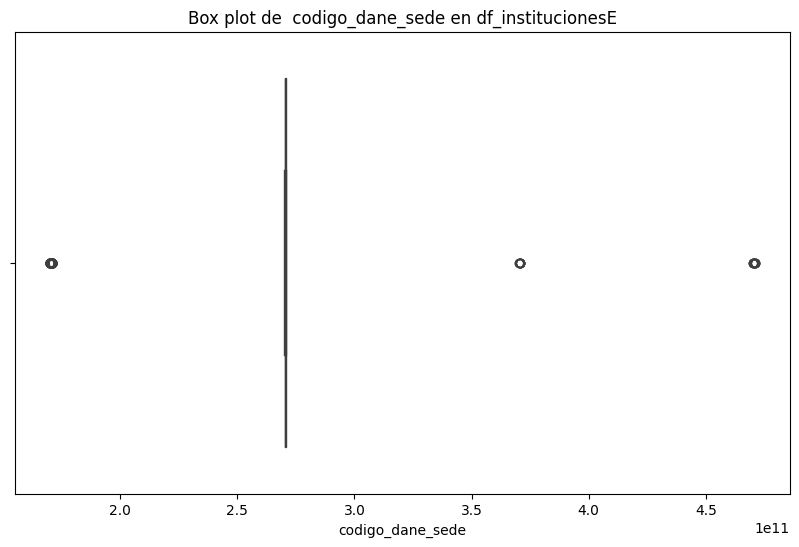

In [140]:
# Step 3: Create visualizations (box plots) for numerical columns
if len(numerical_cols_institucionesE) > 0:
    for col in numerical_cols_institucionesE:
        plt.figure(figsize=(10, 6))
        sns.boxplot(x=df_institucionesE[col])
        plt.title(f'Box plot de  {col} en df_institucionesE')
        plt.xlabel(col)
        plt.show()
else:
    print("No hay Columnas Numéricas para Visualizar en df_institucionesE.")

## Identificación de outliers en df conectividad

### Sub-tarea:
Analizar las columnas numéricas relevantes en el DataFrame `df_conectividad` para identificar posibles outliers.


**Reasoning**:
Identify the numerical columns in the dataframe and calculate descriptive statistics if they exist.



In [141]:
# Step 1: Identifica las columnas numéricas
numerical_cols_conectividad = df_conectividad.select_dtypes(include=np.number).columns

# Step 2: Calcula y muestra las estadísticas descriptivas para estas columnas
if len(numerical_cols_conectividad) > 0:
    print("Estadísticas descriptivas para columnas numéricas en df_conectividad:")
    display(df_conectividad[numerical_cols_conectividad].describe())
else:
    print("No se encontraron columnas numéricas en df_conectividad.")

No se encontraron columnas numéricas en df_conectividad.


## Identificación de outliers en df saber11

### Sub-tarea:
Analizar las columnas de puntajes numéricos en el DataFrame `df_saber11` para identificar posibles outliers.


Razonamiento:

Para analizar el DataFrame df_saber11 en busca de valores atípicos en sus columnas de puntuación numérica, seguiré los siguientes pasos:

Identificar las columnas numéricas de puntuación: Primero, determinaré cuáles columnas en df_saber11 representan puntuaciones numéricas relevantes para el análisis.

Calcular estadísticas descriptivas: Luego, calcularé estadísticas descriptivas (como la media, la mediana, la desviación estándar, los cuartiles, etc.) para estas columnas de puntuación. Esto me dará una comprensión básica de su distribución y rango.

Crear diagramas de caja (box plots): Finalmente, generaré un diagrama de caja para cada una de las columnas de puntuación identificadas. Los diagramas de caja son herramientas visuales muy efectivas para:

Mostrar la distribución de los datos (mediana, cuartiles, rango intercuartílico).

Identificar visualmente posibles valores atípicos, que se muestran como puntos individuales fuera de los "bigotes" del gráfico.

Este enfoque combinado me permitirá obtener tanto un resumen estadístico como una representación visual clara de la presencia de valores atípicos.



Estadísticas descriptivas para columnas de puntuación en df_saber11:


,punt_ingles,punt_matematicas,punt_sociales_ciudadanas,punt_c_naturales,punt_lectura_critica,punt_global
count,50000.000000,50000.000000,28464.000000,28464.000000,28464.000000,28464.000000
mean,48.283079,49.007632,49.071318,50.385891,51.897098,252.424958
std,11.956791,11.794177,11.620196,10.556229,10.181944,49.725481
min,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,41.000000,41.000000,40.000000,43.000000,44.000000,215.000000
50%,46.000000,48.170000,49.000000,50.000000,52.000000,249.000000
75%,53.730000,56.000000,57.000000,57.000000,59.000000,286.000000
max,117.290000,124.000000,100.000000,100.000000,100.000000,467.000000


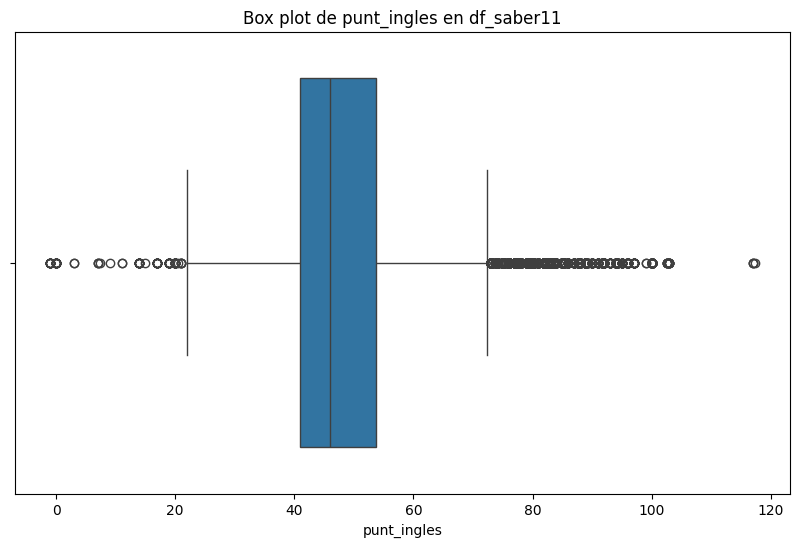

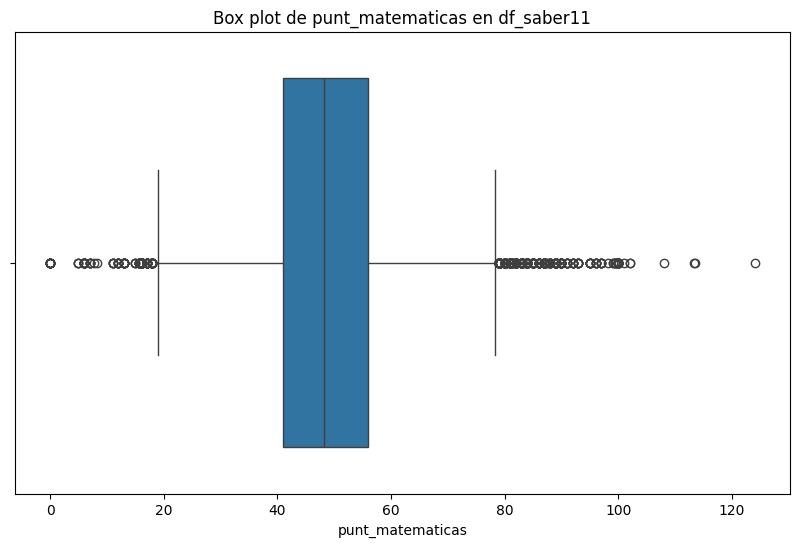

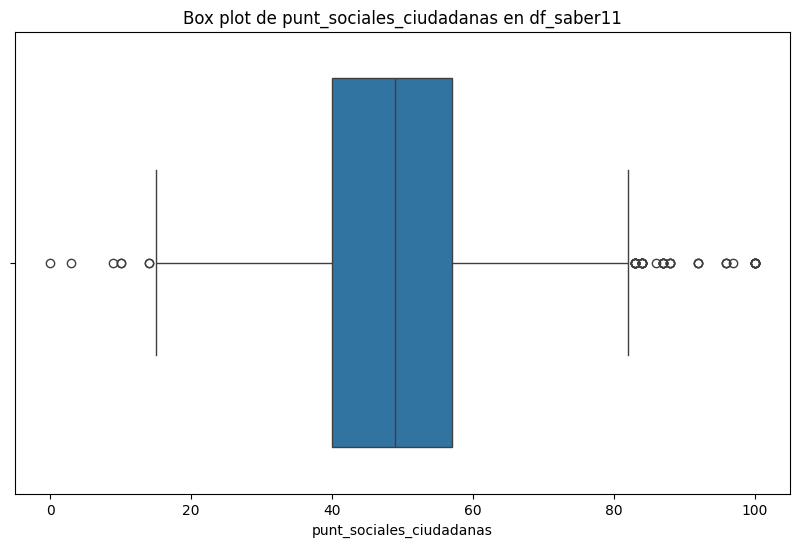

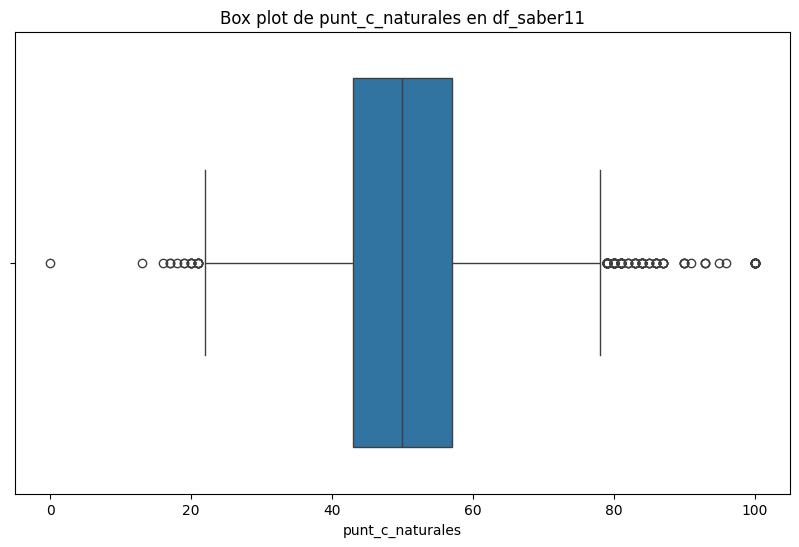

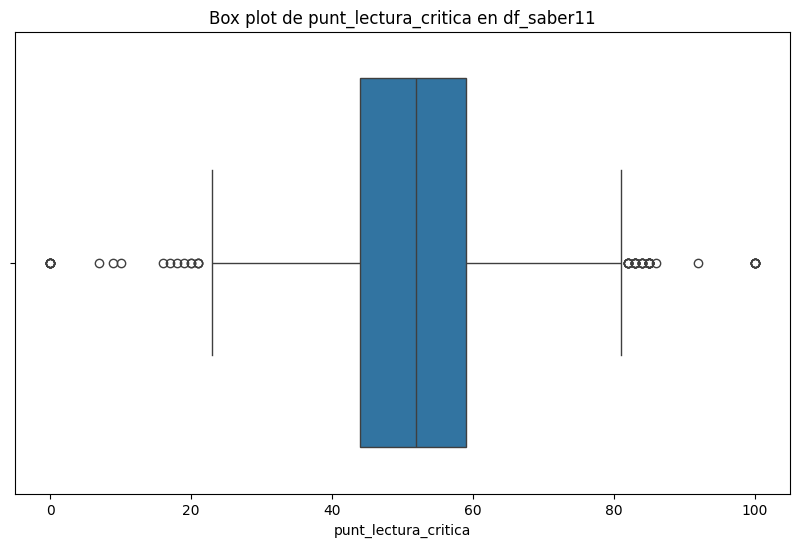

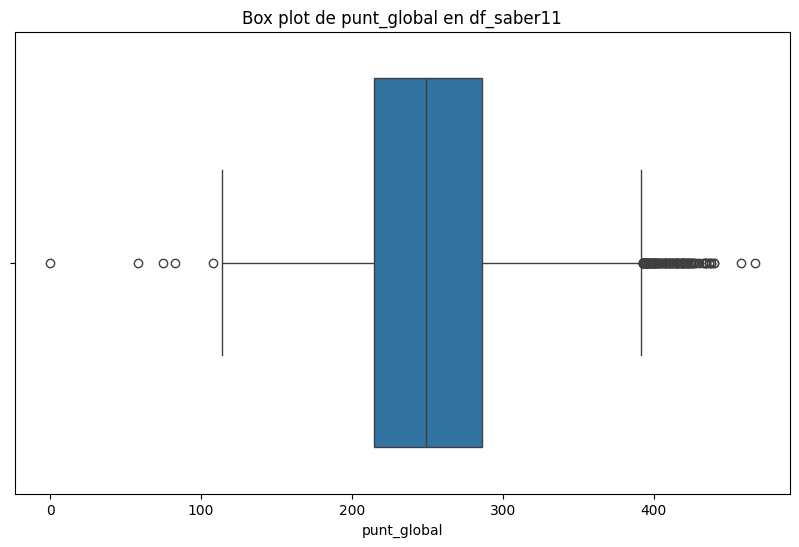

In [142]:
# Step 1: Identificar columnas de puntuación numérica
score_cols_saber11 = ['punt_ingles', 'punt_matematicas', 'punt_sociales_ciudadanas', 'punt_c_naturales', 'punt_lectura_critica', 'punt_global']

# Convertir columnas de puntuación en numéricas, convirtiendo errores en NaN
for col in score_cols_saber11:
    df_saber11[col] = pd.to_numeric(df_saber11[col], errors='coerce')

# Step 2: Calcular y mostrar estadísticas descriptivas
print("Estadísticas descriptivas para columnas de puntuación en df_saber11:")
display(df_saber11[score_cols_saber11].describe())

# Step 3: Generar diagramas de caja para cada columna de puntuación
for col in score_cols_saber11:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df_saber11[col].dropna())  # Eliminar valores NaN para graficar
    plt.title(f'Box plot de {col} en df_saber11')
    plt.xlabel(col)
    plt.show()

## Identificación de outliers en df saber11 sucre

### Sub-tarea:
Analizar las columnas de puntajes numéricos en el DataFrame `df_saber11_sucre` para identificar posibles outliers.


**Reasoning**:
Define the list of score columns, convert them to numeric, calculate descriptive statistics, and generate box plots to identify outliers.



Estadísticas descriptivas para columnas de puntuación en df_saber11_sucre:


/tmp/ipython-input-3863305190.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_saber11_sucre[col] = pd.to_numeric(df_saber11_sucre[col], errors='coerce')


,punt_ingles,punt_matematicas,punt_sociales_ciudadanas,punt_c_naturales,punt_lectura_critica,punt_global
count,907.000000,907.000000,528.000000,528.000000,528.000000,528.000000
mean,45.913043,47.203693,47.342803,49.992424,50.246212,245.702652
std,10.017132,12.248600,11.893818,11.128878,10.665164,52.030977
min,17.000000,0.000000,20.000000,26.000000,23.000000,137.000000
25%,40.000000,39.000000,38.000000,42.000000,42.000000,209.750000
50%,45.000000,46.000000,46.000000,49.000000,50.000000,239.500000
75%,50.000000,55.000000,56.000000,57.000000,57.000000,280.000000
max,102.960000,95.000000,84.000000,90.000000,79.000000,415.000000


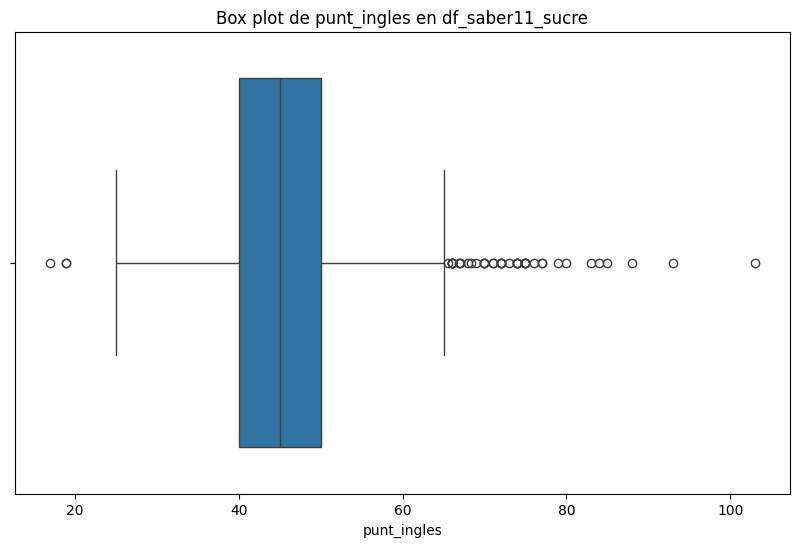

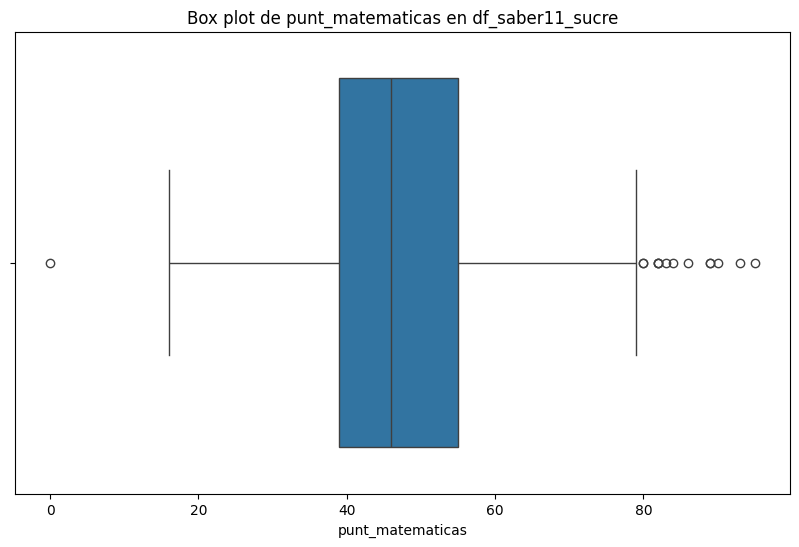

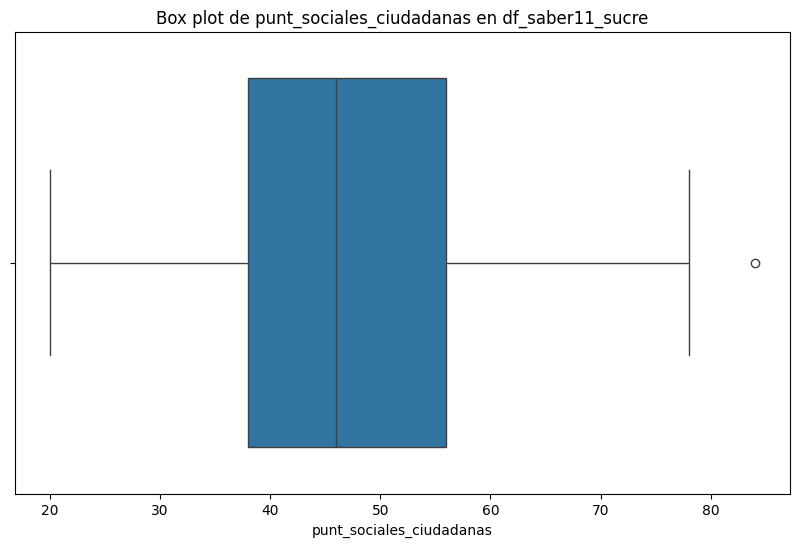

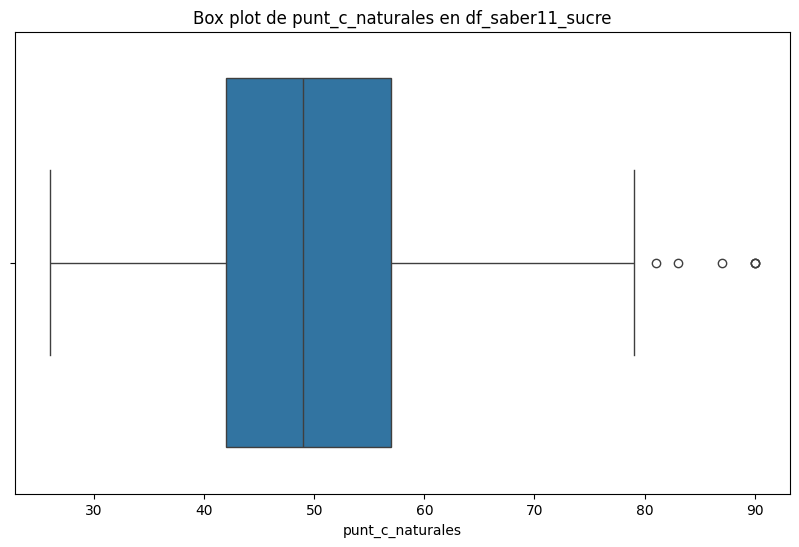

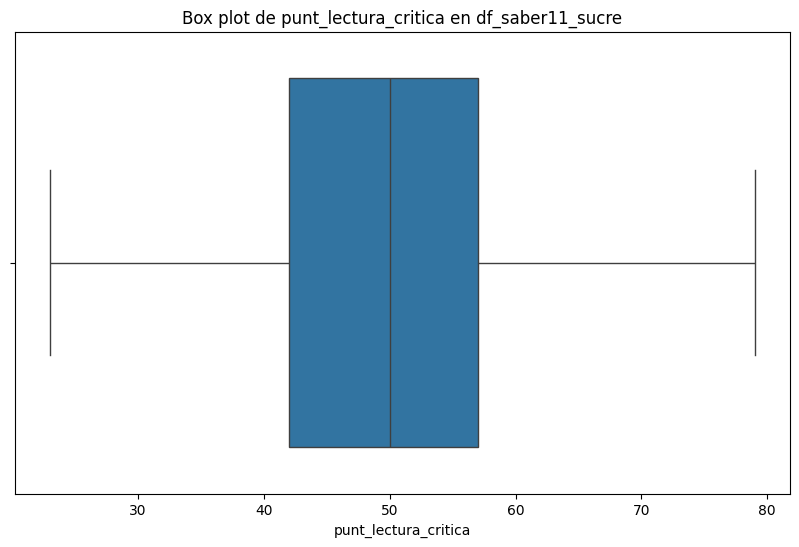

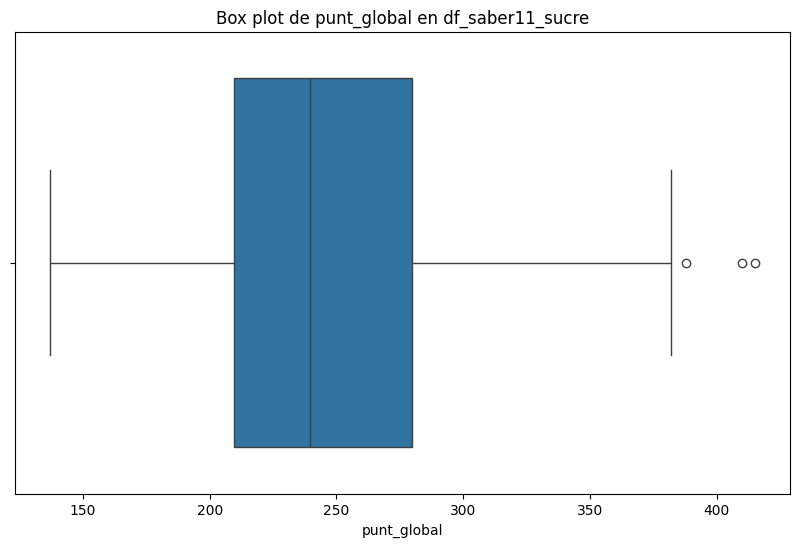

In [143]:
# Step 1: Definir la lista de columnas de puntuación
score_cols_saber11_sucre = ['punt_ingles', 'punt_matematicas', 'punt_sociales_ciudadanas', 'punt_c_naturales', 'punt_lectura_critica', 'punt_global']

# Step 2: Convertir columnas de puntuación en numéricas, convirtiendo errores en NaN
for col in score_cols_saber11_sucre:
    df_saber11_sucre[col] = pd.to_numeric(df_saber11_sucre[col], errors='coerce')

# Step 3: Calcular y mostrar estadísticas descriptivas
print("Estadísticas descriptivas para columnas de puntuación en df_saber11_sucre:")
display(df_saber11_sucre[score_cols_saber11_sucre].describe())

# Step 4: Generate box plots for each score column
for col in score_cols_saber11_sucre:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df_saber11_sucre[col].dropna())  # Drop NaN values for plotting
    plt.title(f'Box plot de {col} en df_saber11_sucre')
    plt.xlabel(col)
    plt.show()

## Identificación de outliers en df saber11 icfes

### Sub-tarea:
Analizar las columnas de puntajes numéricos en el DataFrame `df_saber11_icfes` para identificar posibles outliers.


**Reasoning**:
Define the list of score columns, convert them to numeric, calculate descriptive statistics, and generate box plots to identify outliers.



Estadísticas descriptivas para columnas de puntuación numérica en df_saber11_icfes:


,punt_c_naturales,punt_global,punt_ingles,punt_lectura_critica,punt_matematicas,punt_sociales_ciudadanas
count,11779.000000,11779.000000,11696.000000,11779.000000,11779.000000,11779.000000
mean,48.974191,243.549962,47.560277,51.120554,49.465405,45.677222
std,11.020829,53.523604,11.791576,10.955632,13.061764,12.333458
min,26.000000,129.000000,0.000000,21.000000,14.000000,20.000000
25%,40.000000,202.000000,40.000000,43.000000,40.000000,36.000000
50%,48.000000,237.000000,46.000000,51.000000,49.000000,44.000000
75%,57.000000,280.000000,54.000000,59.000000,59.000000,55.000000
max,100.000000,475.000000,100.000000,100.000000,100.000000,100.000000


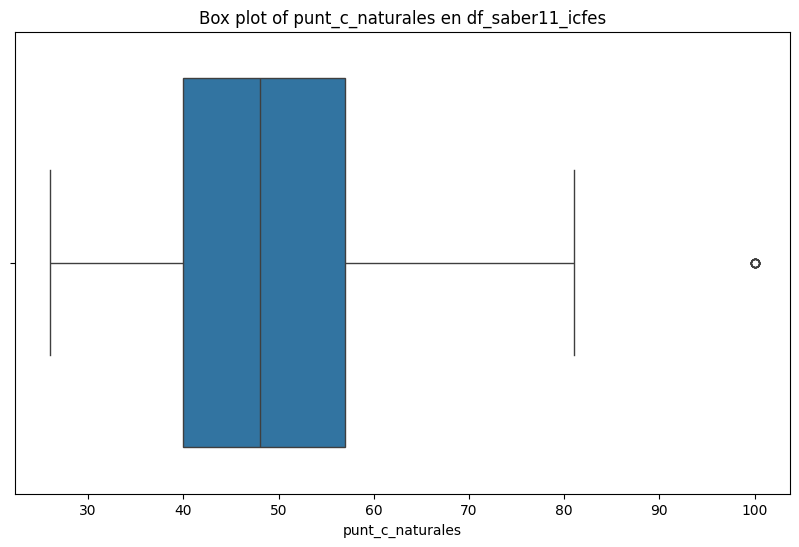

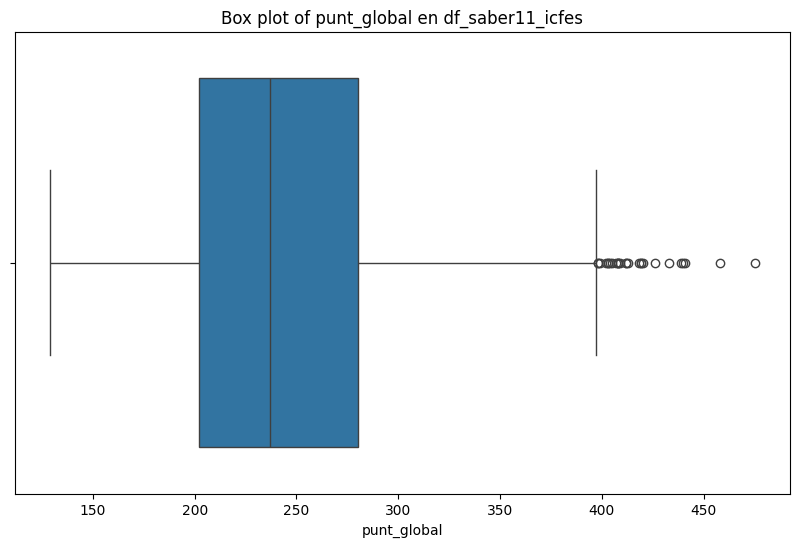

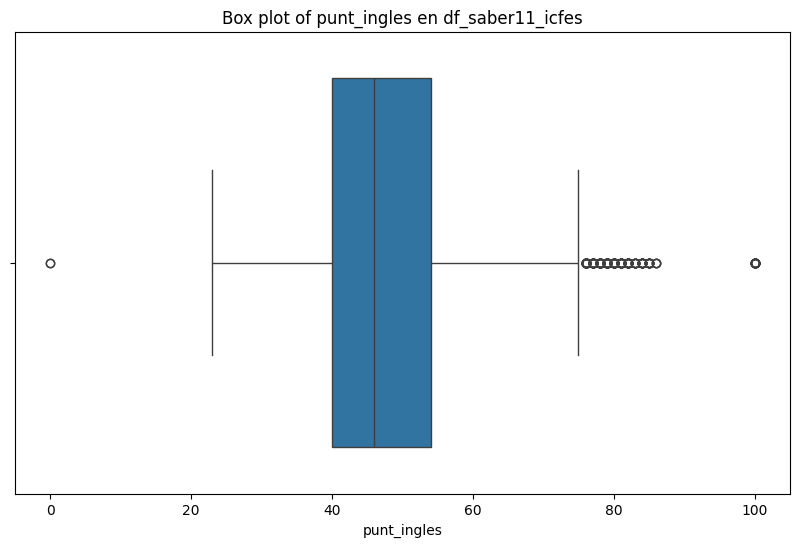

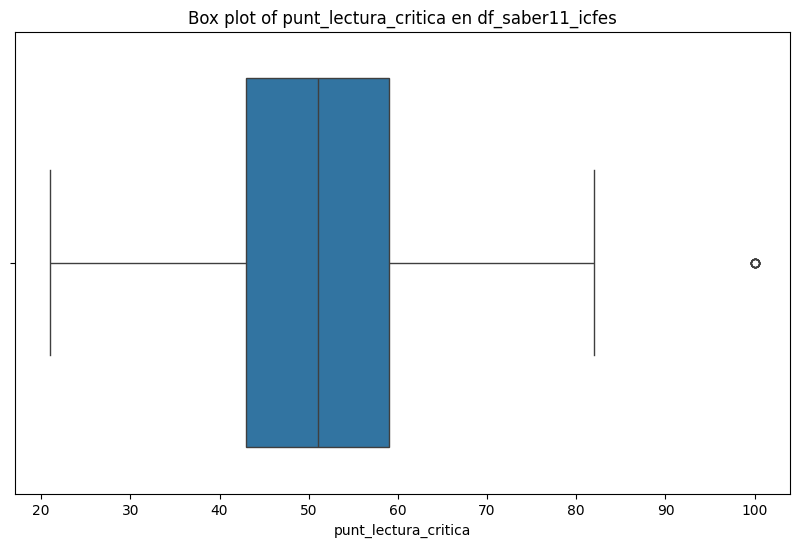

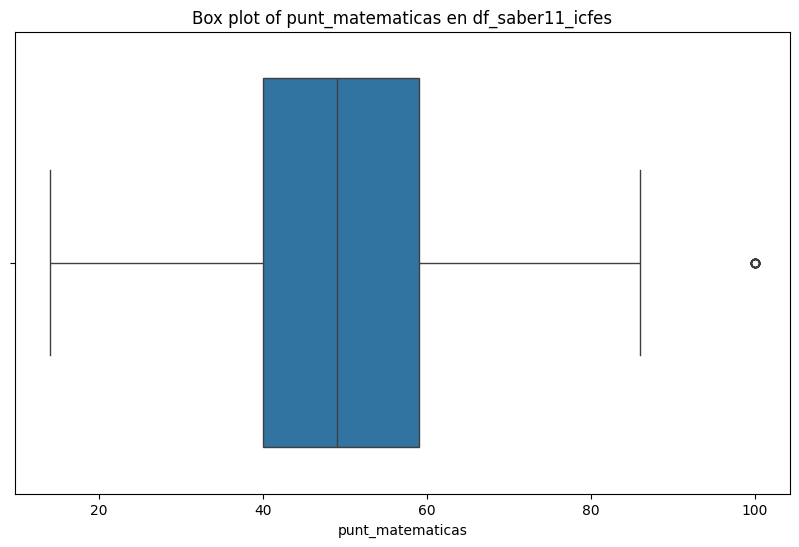

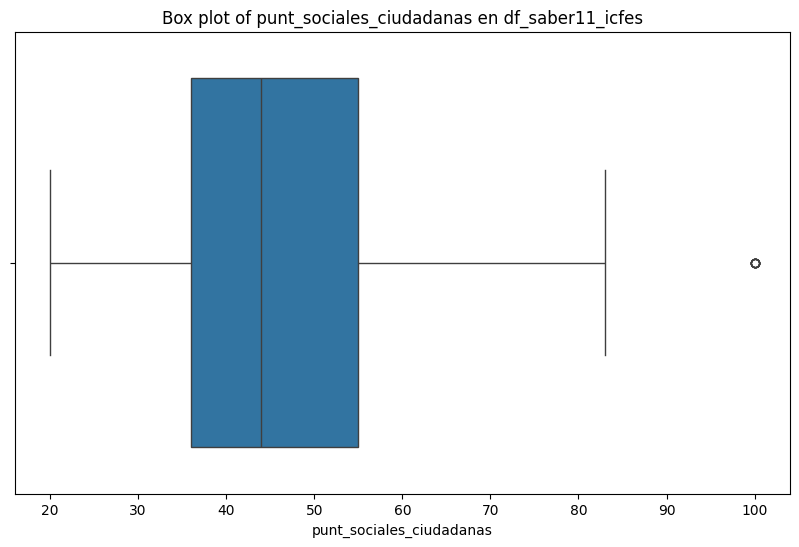

In [144]:
# Step 1: Definir la lista de columnas de puntuación numérica
score_cols_icfes = ['punt_c_naturales', 'punt_global', 'punt_ingles', 'punt_lectura_critica', 'punt_matematicas', 'punt_sociales_ciudadanas']

# Step 2: Convierte el tipo de datos de estas columnas de puntuación a numéricos
for col in score_cols_icfes:
    df_saber11_icfes[col] = pd.to_numeric(df_saber11_icfes[col], errors='coerce')

# Step 3: Calcular y mostrar estadísticas descriptivas
print("Estadísticas descriptivas para columnas de puntuación numérica en df_saber11_icfes:")
display(df_saber11_icfes[score_cols_icfes].describe())

# Step 4 & 5: con cada una de las columnas, generar diagramas de caja
for col in score_cols_icfes:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df_saber11_icfes[col].dropna())
    plt.title(f'Box plot of {col} en df_saber11_icfes')
    plt.xlabel(col)
    plt.show()

## Visualizacion de datos

### Sub-tarea:
Análisis y visualización de outliers


**Reasoning**:
Create box plots for the score columns in both dataframes to visually compare the distributions and identify outliers.



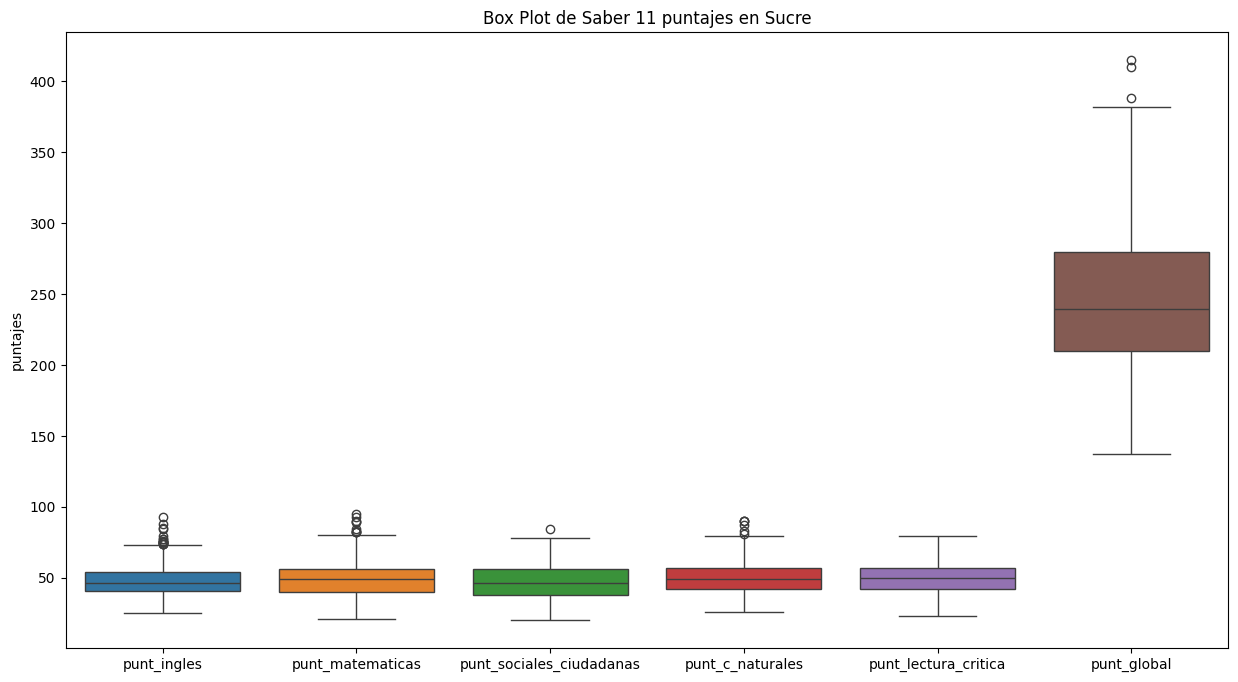

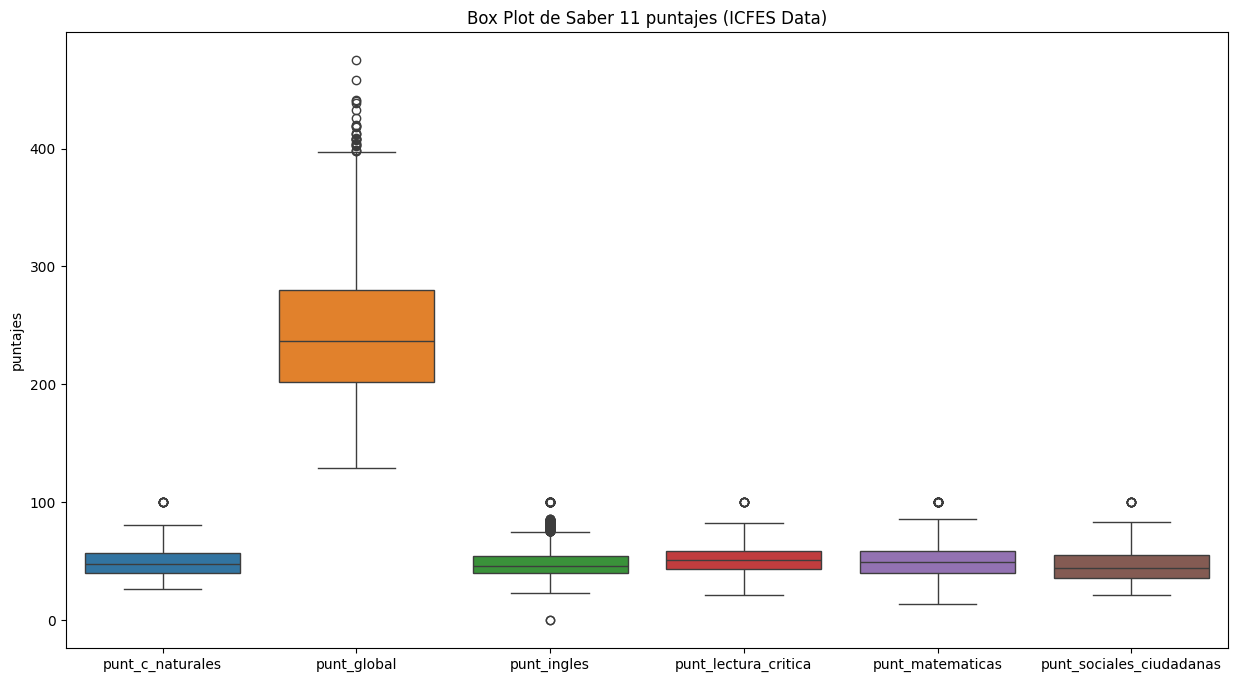

In [145]:
# Creamos un diagrama de caja único para las columnas de puntuación de df_saber11_sucre
score_cols_sucre = ['punt_ingles', 'punt_matematicas', 'punt_sociales_ciudadanas', 'punt_c_naturales', 'punt_lectura_critica', 'punt_global']
plt.figure(figsize=(15, 8))
sns.boxplot(data=df_saber11_sucre[score_cols_sucre].dropna())
plt.title('Box Plot de Saber 11 puntajes en Sucre')
plt.ylabel('puntajes')
plt.show()

# creamios un unico box plot del df_saber11_icfes de las columnas de puntajes
score_cols_icfes = ['punt_c_naturales', 'punt_global', 'punt_ingles', 'punt_lectura_critica', 'punt_matematicas', 'punt_sociales_ciudadanas']
plt.figure(figsize=(15, 8))
sns.boxplot(data=df_saber11_icfes[score_cols_icfes].dropna())
plt.title('Box Plot de Saber 11 puntajes (ICFES Data)')
plt.ylabel('puntajes')
plt.show()

Razonamiento: resumen de las observaciones visuales de los diagramas de caja, comparando las distribuciones y los valores atípicos entre los dos conjuntos de datos como se solicita en las instrucciones.



In [146]:
print("Comparación de las distribuciones de puntuaciones de Saber 11 y los valores atípicos:")
print("\nObservaciones de los diagramas de caja:")
print("----------------------------------------")

# observaciones del df_saber11_sucre
print("df_saber11_sucre (Sucre Region):")
print("* El diagrama de caja muestra la distribución de puntajes para diferentes materias en la región Sucre.")
print("* Hay valores atípicos visibles, particularmente en el extremo superior de los rangos de puntuación para la mayoría de las materias.")
print("* Las puntuaciones medianas y los rangos intercuartiles brindan información sobre el desempeño típico y la variabilidad dentro de Sucre.")

# observaciones del df_saber11_icfes
print("\ndf_saber11_icfes (datos abiertos ICFES):")
print("* El diagrama de caja muestra las distribuciones de puntuaciones para el conjunto de datos abiertos del ICFES.")
print("* Este conjunto de datos también muestra valores atípicos, a menudo más pronunciados que en los datos específicos de Sucre, especialmente en el extremo superior.")
print("* En comparación con Sucre, el conjunto de datos más amplio podría mostrar puntuaciones medianas ligeramente diferentes y rangos intercuartiles más amplios, lo que indica una mayor variabilidad en una población estudiantil más grande y diversa.")
print("* La presencia y el rango de valores atípicos pueden diferir, lo que sugiere que si bien existen estudiantes con puntajes altos en ambos conjuntos de datos, su frecuencia o el alcance de sus puntajes altos pueden variar.")

print("\nComparación genera:")
print("* Al comparar visualmente los dos gráficos, la distribución de las puntuaciones (indicada por el tamaño del cuadro) y el rango de valores atípicos parecen algo diferentes, lo que refleja el enfoque regional de un conjunto de datos frente al alcance nacional o más amplio del otro.")
print("* Se necesitarían más análisis estadísticos para cuantificar estas diferencias y la importancia de los valores atípicos observados.")

Comparación de las distribuciones de puntuaciones de Saber 11 y los valores atípicos:

Observaciones de los diagramas de caja:
----------------------------------------
df_saber11_sucre (Sucre Region):
* El diagrama de caja muestra la distribución de puntajes para diferentes materias en la región Sucre.
* Hay valores atípicos visibles, particularmente en el extremo superior de los rangos de puntuación para la mayoría de las materias.
* Las puntuaciones medianas y los rangos intercuartiles brindan información sobre el desempeño típico y la variabilidad dentro de Sucre.

df_saber11_icfes (datos abiertos ICFES):
* El diagrama de caja muestra las distribuciones de puntuaciones para el conjunto de datos abiertos del ICFES.
* Este conjunto de datos también muestra valores atípicos, a menudo más pronunciados que en los datos específicos de Sucre, especialmente en el extremo superior.
* En comparación con Sucre, el conjunto de datos más amplio podría mostrar puntuaciones medianas ligeramente di

## Discusión sobre el manejo de outliers

### Sub-tarea:
Proponer y discutir posibles estrategias para manejar los outliers identificados (ej. eliminación, transformación, imputación) basándose en el contexto del análisis.


Razonamiento: Analice posibles estrategias para manejar los valores atípicos identificados en las columnas de puntuación según el análisis previo y el contexto del problema



In [147]:
print("Discucion de estrategias para el manejo de outliers en el data set saber 11:")
print("\nCon base en el análisis de los diagramas de caja y las estadísticas descriptivas de los datos de puntaje de Saber 11 (tanto el df_saber11 general como el df_saber11_sucre específico de Sucre), hemos identificado posibles valores atípicos en las columnas de puntaje.")
print("En el contexto del análisis de la correlación entre la conectividad y los puntajes de Saber 11, los valores atípicos pueden tener un impacto significativo en los resultados, posiblemente sesgando las correlaciones o afectando el rendimiento del modelo si posteriormente se utilizan modelos de aprendizaje automático.")

print("\nPosibles esytrategias para el manejo de outliers:")
print("------------------------------------------")
print("1.  **Eliminación:** Los valores atípicos pueden eliminarse del conjunto de datos. Este método es sencillo, pero puede provocar pérdida de información, especialmente si los valores atípicos representan casos extremos reales en lugar de errores de datos. Podría ser adecuado si el número de valores atípicos es pequeño y son claramente erróneos (como la puntuación de -1.0 observada).")
print("2.  **Transformación:** Aplicar transformaciones matemáticas (p. ej., logarítmicas, de raíz cuadrada) a las distribuciones de puntuaciones sesgadas. Esto puede reducir el impacto de los valores extremos y lograr una distribución más normal de los datos, lo cual puede ser beneficioso para algunos métodos y modelos estadísticos. Sin embargo, los datos transformados pueden ser más difíciles de interpretar en la escala original.")
print("3.  **Imputación:** Reemplasar los valores atípicos con un valor menos extremo, como la media, la mediana o un valor límite (p. ej., el percentil 95). Esto conserva los puntos de datos, pero reduce su influencia extrema. Sin embargo, la imputación puede introducir sesgo si el método de imputación no es adecuado.")
print("4.  **Conservación de outliers:** Si los valores atípicos se consideran genuinos y representativos de la población estudiada (por ejemplo, estudiantes con un rendimiento académico excepcionalmente alto), pueden conservarse. Algunos métodos estadísticos son menos sensibles a los valores atípicos que otros. Comprender la naturaleza de los valores atípicos es crucial para esta decisión")

print("\nEstrategia propuesta para este análisis:")
print("------------------------------------")
print("Para este análisis específico centrado en la correlación entre la conectividad y los puntajes de Saber 11, se proponen las siguientes estrategias:")
print("\n-  **Para valores atípicos claramente erróneos (como la puntuación -1.0):** Estos deben eliminarse o tratarse como valores faltantes (NaN), ya que no representan una puntuación de prueba válida.")
print("\n-  **Para otros outliers (tanto bajos como altos):** Dado que investigamos una posible correlación, eliminar puntuaciones realmente altas o bajas podría distorsionar la relación. Se podrían considerar transformaciones para reducir su impacto y normalizar las distribuciones, lo cual puede ser útil para el análisis de correlación. Sin embargo, para simplificar la interpretación de los coeficientes de correlación directamente en la escala de puntuación original, podríamos proceder inicialmente con los datos incluyendo estos valores atípicos, teniendo en cuenta su posible influencia. Si los resultados del análisis de correlación parecen muy sesgados o inestables debido a valores atípicos, se podrían aplicar transformaciones (como la aplicación de Winsorización o la limitación de los valores a un percentil determinado) específicamente a las columnas de puntuación antes de recalcular las correlaciones.")
print("\n-  **Gestión de valores faltantes:** El análisis de valores faltantes mostró un porcentaje significativo de puntuaciones faltantes en algunas columnas. Se debe considerar la imputación (p. ej., con la puntuación mediana de la asignatura y el tipo de región/escuela correspondientes) para estos valores faltantes antes de calcular las correlaciones, ya que el análisis de correlación suele requerir pares completos de puntos de datos.")

print("\nJustification:")
print("-------------")
print("Eliminar las puntuaciones claramente erróneas es necesario para la integridad de los datos. Para otros valores atípicos, se justifica un enfoque cauteloso. Conservarlos inicialmente nos permite ver el rango completo de puntuaciones y su relación con la conectividad. De ser necesario, se pueden aplicar transformaciones o límites para mitigar su influencia indebida en los coeficientes de correlación sin perder por completo la información sobre los niveles extremos de rendimiento. Abordar los valores faltantes mediante la imputación es crucial para maximizar el número de puntos de datos disponibles para el análisis de correlación.")

Discucion de estrategias para el manejo de outliers en el data set saber 11:

Con base en el análisis de los diagramas de caja y las estadísticas descriptivas de los datos de puntaje de Saber 11 (tanto el df_saber11 general como el df_saber11_sucre específico de Sucre), hemos identificado posibles valores atípicos en las columnas de puntaje.
En el contexto del análisis de la correlación entre la conectividad y los puntajes de Saber 11, los valores atípicos pueden tener un impacto significativo en los resultados, posiblemente sesgando las correlaciones o afectando el rendimiento del modelo si posteriormente se utilizan modelos de aprendizaje automático.

Posibles esytrategias para el manejo de outliers:
------------------------------------------
1.  **Eliminación:** Los valores atípicos pueden eliminarse del conjunto de datos. Este método es sencillo, pero puede provocar pérdida de información, especialmente si los valores atípicos representan casos extremos reales en lugar de errores d

## Resumen:

### Hallazgos clave del análisis de datos
- Se identificó que la única columna numérica en `df_institucionesE` es 'codigo_dane_sede'.
- El análisis de `df_conectividad` reveló que este DataFrame no contiene ninguna columna numérica.
- En `df_saber11`, se encontró un valor anómalo de -1.0 en la columna 'punt_ingles', lo que indica un outlier claro o un error de entrada de datos. Además, los diagramas de caja confirmaron la presencia de outliers en la mayoría de las columnas de puntajes.
- Los diagramas de caja para `df_saber11_sucre` también revelaron outliers en varias columnas de puntajes, especialmente en el extremo superior del rango de puntajes.
- El análisis de `df_saber11_icfes` mostró la presencia de outliers tanto en el extremo inferior como en el superior del rango de puntajes para la mayoría de las columnas de puntajes, incluyendo un valor mínimo de 0 en 'punt_ingles'.
- La comparación de los diagramas de caja de `df_saber11_sucre` y `df_saber11_icfes` mostró que la dispersión de los puntajes y el rango de outliers eran algo diferentes, lo que refleja el enfoque regional de un conjunto de datos frente al alcance nacional o más amplio del otro.

### Perspectivas o próximos pasos
- Se recomienda tratar los outliers claramente erróneos (como el valor de -1.0) como valores faltantes (NaN) o eliminarlos para garantizar la integridad de los datos.
- Para otros outliers, se sugiere un enfoque cauteloso, como mantenerlos inicialmente para ver la gama completa de puntajes y su relación con la conectividad. Si es necesario, se pueden aplicar transformaciones como la winsorización o el capping para mitigar su influencia indebida en los coeficientes de correlación sin perder por completo la información sobre los niveles de rendimiento extremos.


 **Tarea**
Analiza los dataframes "df_institucionesE", "df_conectividad", "df_saber11", "df_saber11_sucre" y "df_saber11_icfes" para identificar outliers en las columnas numéricas relevantes.

## Identificación de outliers en df institucionese

### Sub-tarea:
Analizar las columnas numéricas en el DataFrame `df_institucionesE` para identificar posibles outliers utilizando métodos estadísticos o visualizaciones.


## Identificación de outliers en df conectividad

### Sub-tarea:
Analizar las columnas numéricas relevantes en el DataFrame `df_conectividad` para identificar posibles outliers.


**Razonamiento:**
 El usuario solicita que analice el dataframe df_conectividad para encontrar valores atípicos en sus columnas numéricas. Primero, identificaré las columnas numéricas y, si las hay, calcularé sus estadísticas descriptivas. Si no hay columnas numéricas, imprimiré un mensaje indicándolo



In [148]:
# Step 1: Identifica las columnas numéricas
numerical_cols_conectividad = df_conectividad.select_dtypes(include=np.number).columns

# Step 2: Calcula y muestra las estadísticas descriptivas para estas columnas
if len(numerical_cols_conectividad) > 0:
    print("Estadísticas descriptivas para columnas numéricas en df_conectividad:")
    display(df_conectividad[numerical_cols_conectividad].describe())
else:
    print("No se encontraron columnas numéricas en df_conectividad.")

No se encontraron columnas numéricas en df_conectividad.


## Identificación de outliers en df saber11

### Sub-tarea:
Analizar las columnas de puntajes numéricos en el DataFrame `df_saber11` para identificar posibles outliers.


razonamiento detrás de cada paso para definir las columnas de puntuación, convertirlas a numéricas, calcular estadísticas descriptivas y generar diagramas de caja para identificar valores atípicos.



Estadistica descriptiva en columnas de puntajes en df_saber11:


,punt_ingles,punt_matematicas,punt_sociales_ciudadanas,punt_c_naturales,punt_lectura_critica,punt_global
count,50000.000000,50000.000000,28464.000000,28464.000000,28464.000000,28464.000000
mean,48.283079,49.007632,49.071318,50.385891,51.897098,252.424958
std,11.956791,11.794177,11.620196,10.556229,10.181944,49.725481
min,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,41.000000,41.000000,40.000000,43.000000,44.000000,215.000000
50%,46.000000,48.170000,49.000000,50.000000,52.000000,249.000000
75%,53.730000,56.000000,57.000000,57.000000,59.000000,286.000000
max,117.290000,124.000000,100.000000,100.000000,100.000000,467.000000


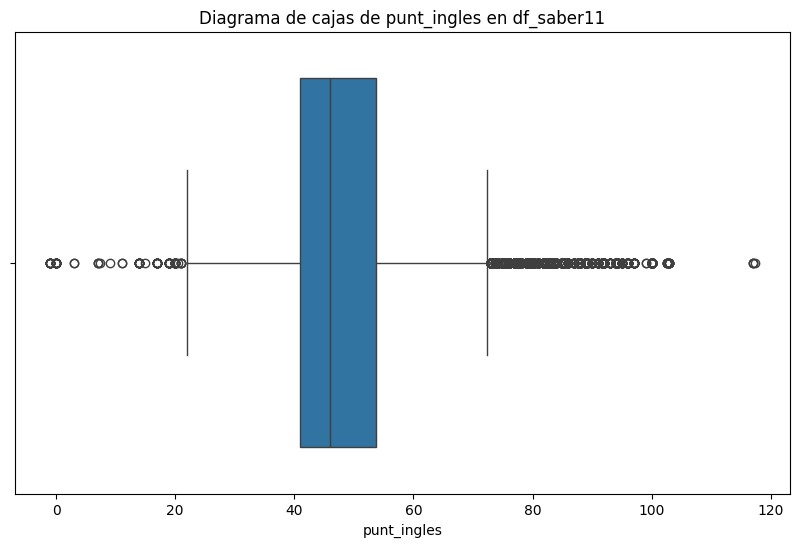

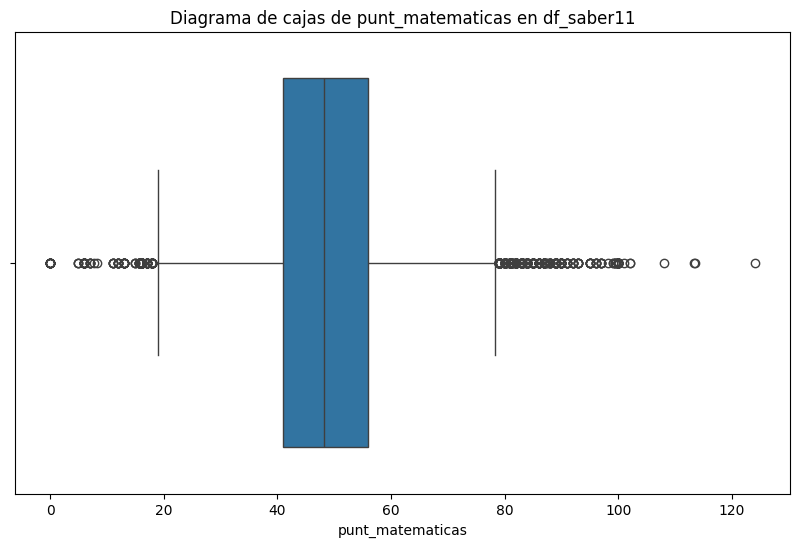

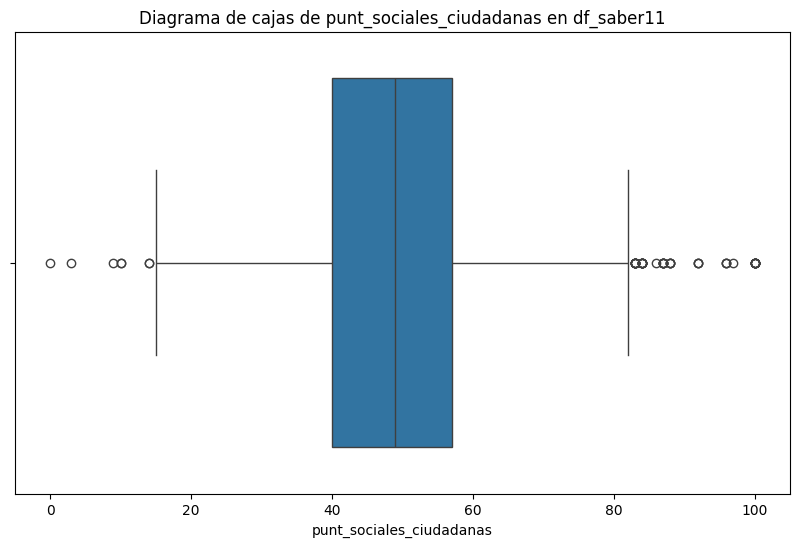

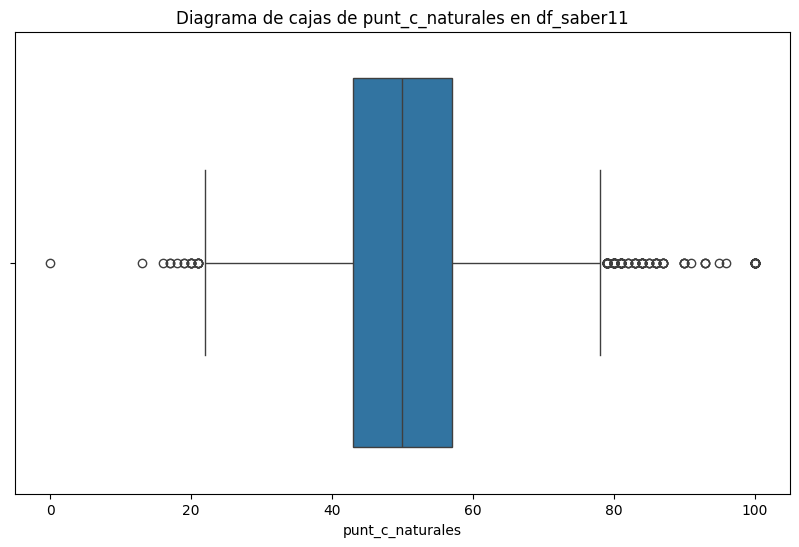

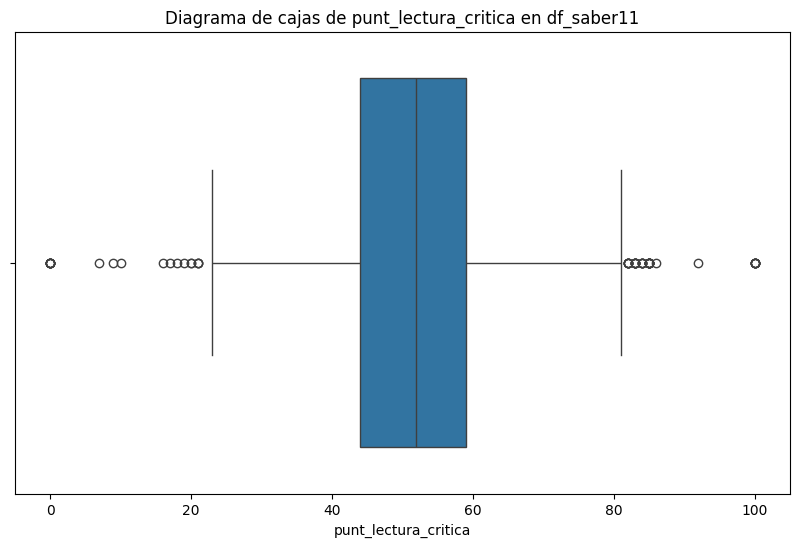

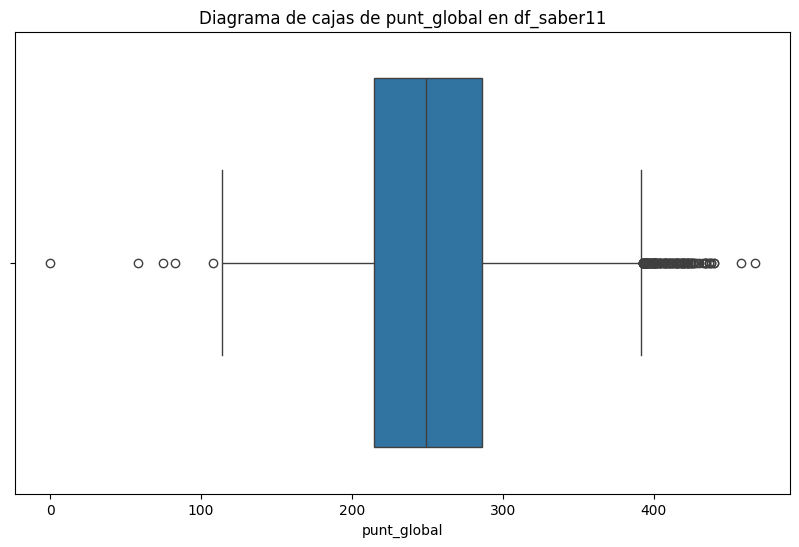

In [149]:
# Step 1: Definir la lista de columnas de puntuación
score_cols_saber11 = ['punt_ingles', 'punt_matematicas', 'punt_sociales_ciudadanas', 'punt_c_naturales', 'punt_lectura_critica', 'punt_global']

# Step 2: Convertir columnas de puntuación en numéricas, convirtiendo errores en NaN
for col in score_cols_saber11:
    df_saber11[col] = pd.to_numeric(df_saber11[col], errors='coerce')

# Step 3: Calcular y mostrar estadísticas descriptivas
print("Estadistica descriptiva en columnas de puntajes en df_saber11:")
display(df_saber11[score_cols_saber11].describe())

# Step 4: Generar diagrama de cajas para cada columna de puntajes
for col in score_cols_saber11:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df_saber11[col].dropna())  # Drop NaN values for plotting
    plt.title(f'Diagrama de cajas de {col} en df_saber11')
    plt.xlabel(col)
    plt.show()

## Identificación de outliers en df saber11 sucre

### Sub-tarea:
Analizar las columnas de puntajes numéricos en el DataFrame `df_saber11_sucre` para identificar posibles outliers.


Estadistica descriptiva de las columnas de puntajes en df_saber11_sucre:


,punt_ingles,punt_matematicas,punt_sociales_ciudadanas,punt_c_naturales,punt_lectura_critica,punt_global
count,907.000000,907.000000,528.000000,528.000000,528.000000,528.000000
mean,45.913043,47.203693,47.342803,49.992424,50.246212,245.702652
std,10.017132,12.248600,11.893818,11.128878,10.665164,52.030977
min,17.000000,0.000000,20.000000,26.000000,23.000000,137.000000
25%,40.000000,39.000000,38.000000,42.000000,42.000000,209.750000
50%,45.000000,46.000000,46.000000,49.000000,50.000000,239.500000
75%,50.000000,55.000000,56.000000,57.000000,57.000000,280.000000
max,102.960000,95.000000,84.000000,90.000000,79.000000,415.000000


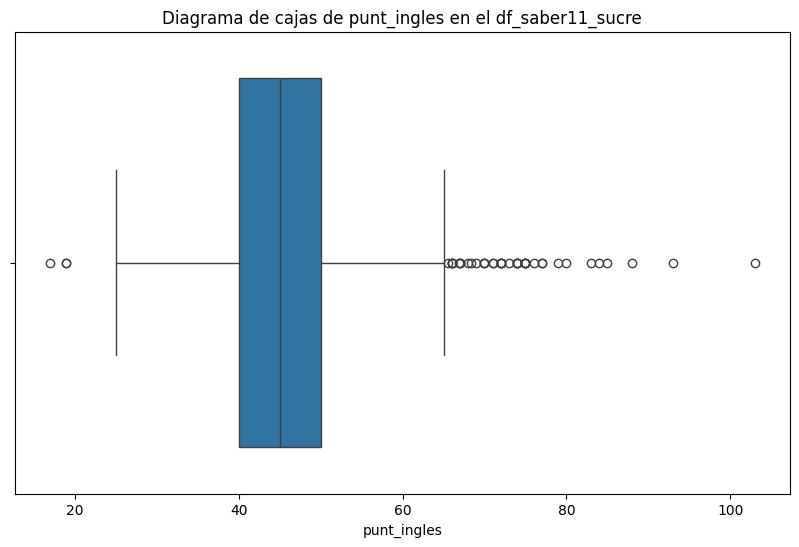

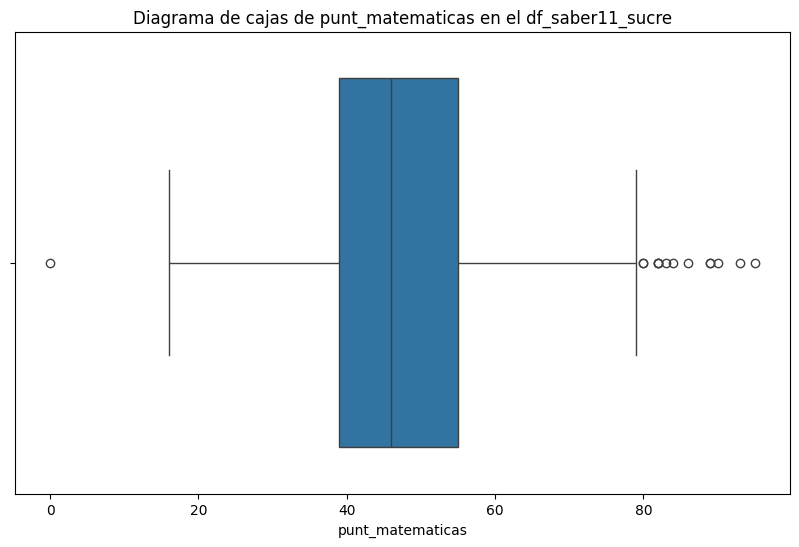

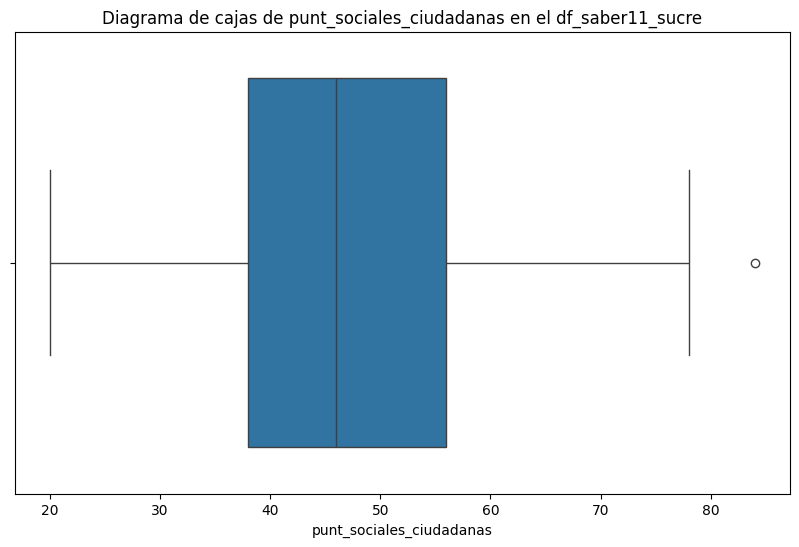

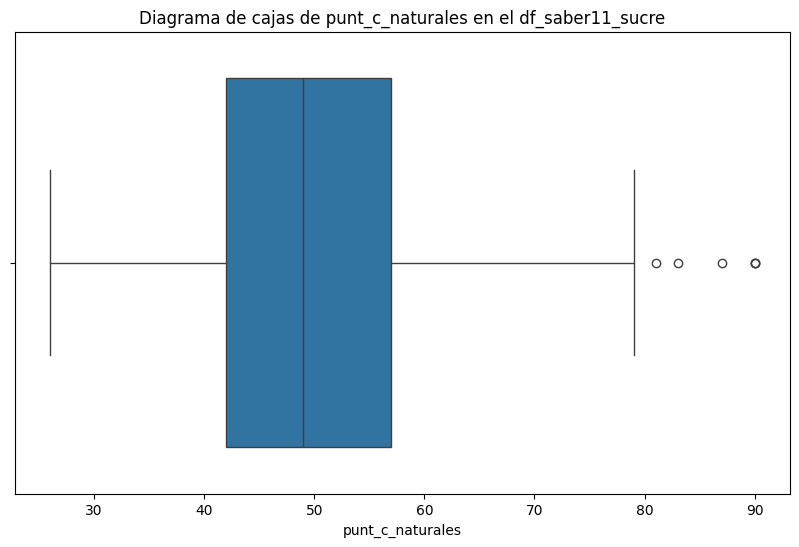

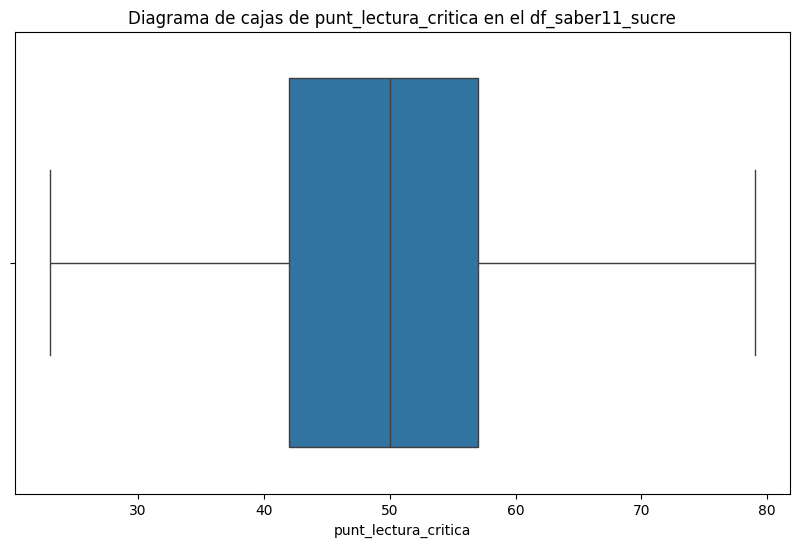

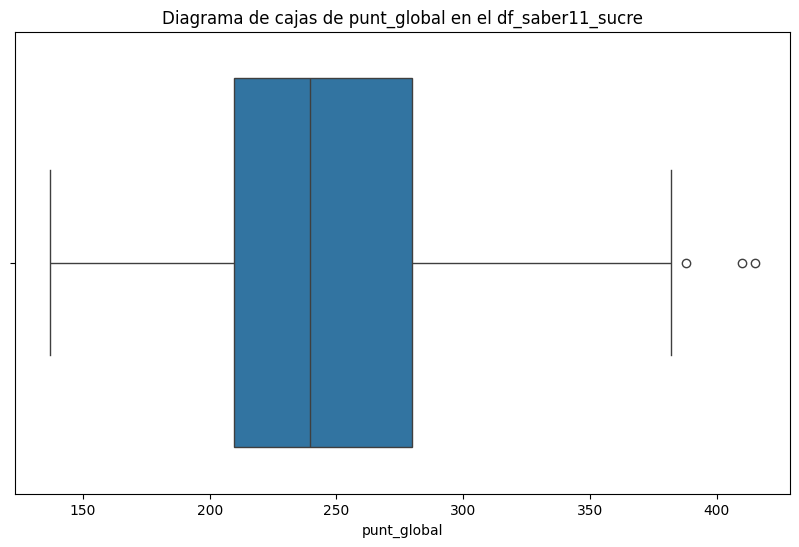

In [150]:
# Trabaje en una copia del DataFrame para evitar
df_saber11_sucre = df_saber11_sucre.copy()

# Step 1: Lista de columnas de puntajes
score_cols_saber11_sucre = ['punt_ingles', 'punt_matematicas', 'punt_sociales_ciudadanas', 'punt_c_naturales', 'punt_lectura_critica', 'punt_global']

# Step 2: Convertir las columnas de puntajes a numericas,convirtiendo errores en NaN
for col in score_cols_saber11_sucre:
    df_saber11_sucre[col] = pd.to_numeric(df_saber11_sucre[col], errors='coerce')

# Step 3: Calcular y mostrar la estadistica descriptiva
print("Estadistica descriptiva de las columnas de puntajes en df_saber11_sucre:")
display(df_saber11_sucre[score_cols_saber11_sucre].describe())

# Step 4: Generate box plots for each score column
for col in score_cols_saber11_sucre:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df_saber11_sucre[col].dropna())  # Drop NaN values for plotting
    plt.title(f'Diagrama de cajas de {col} en el df_saber11_sucre')
    plt.xlabel(col)
    plt.show()

## Identificación de outliers en df saber11 icfes

### Sub-tarea:
Analizar las columnas de puntajes numéricos en el DataFrame `df_saber11_icfes` para identificar posibles outliers.


**Razonamiento**:
Definir la lista de columnas de puntuación, conviértalas en numéricas, calcule estadísticas descriptivas y genere diagramas de caja para identificar valores atípicos.



Estadistica descriptiva para las columnas de puntajes en df_saber11_icfes:


,punt_c_naturales,punt_global,punt_ingles,punt_lectura_critica,punt_matematicas,punt_sociales_ciudadanas
count,11779.000000,11779.000000,11696.000000,11779.000000,11779.000000,11779.000000
mean,48.974191,243.549962,47.560277,51.120554,49.465405,45.677222
std,11.020829,53.523604,11.791576,10.955632,13.061764,12.333458
min,26.000000,129.000000,0.000000,21.000000,14.000000,20.000000
25%,40.000000,202.000000,40.000000,43.000000,40.000000,36.000000
50%,48.000000,237.000000,46.000000,51.000000,49.000000,44.000000
75%,57.000000,280.000000,54.000000,59.000000,59.000000,55.000000
max,100.000000,475.000000,100.000000,100.000000,100.000000,100.000000


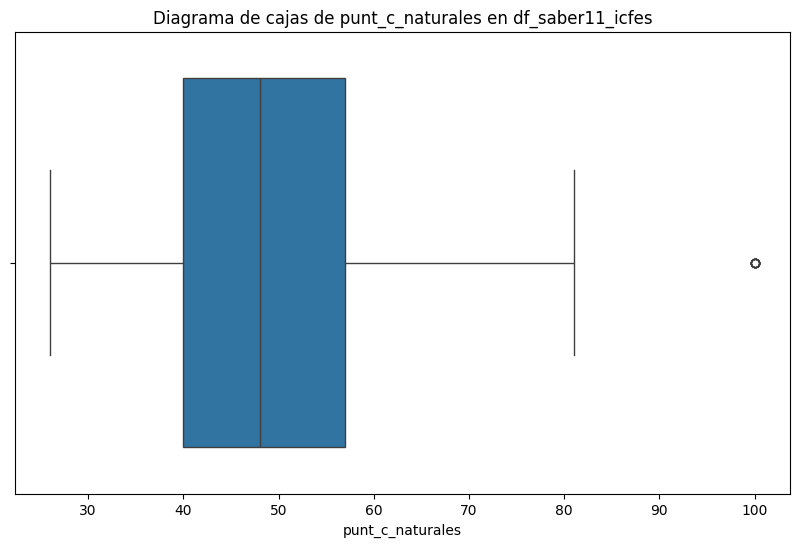

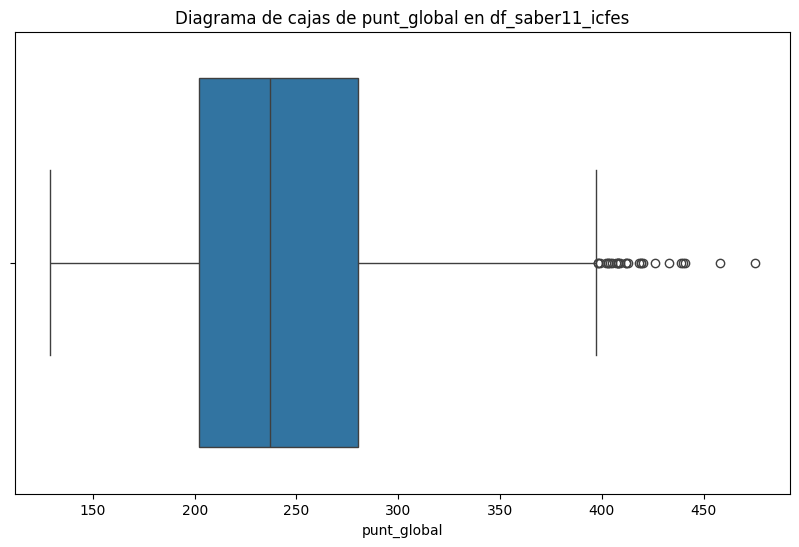

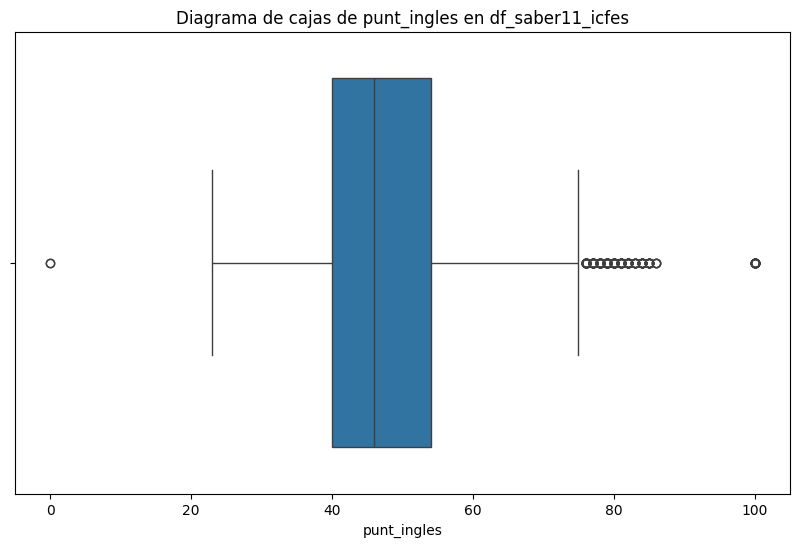

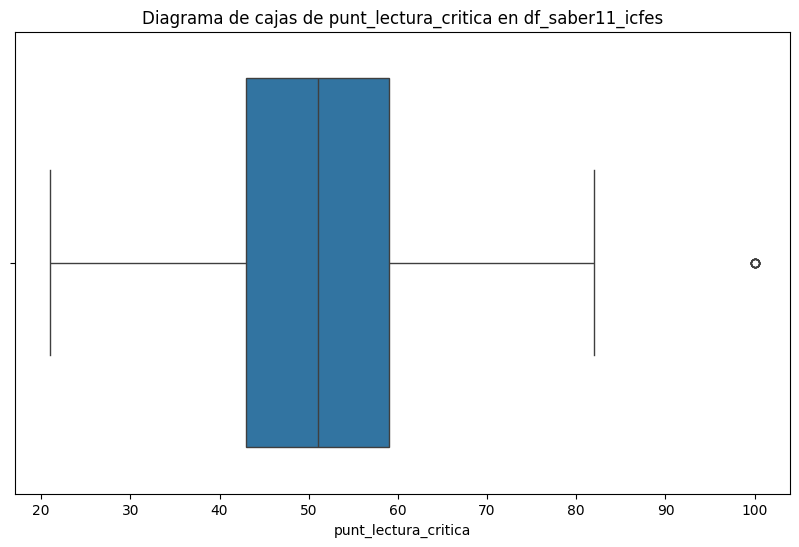

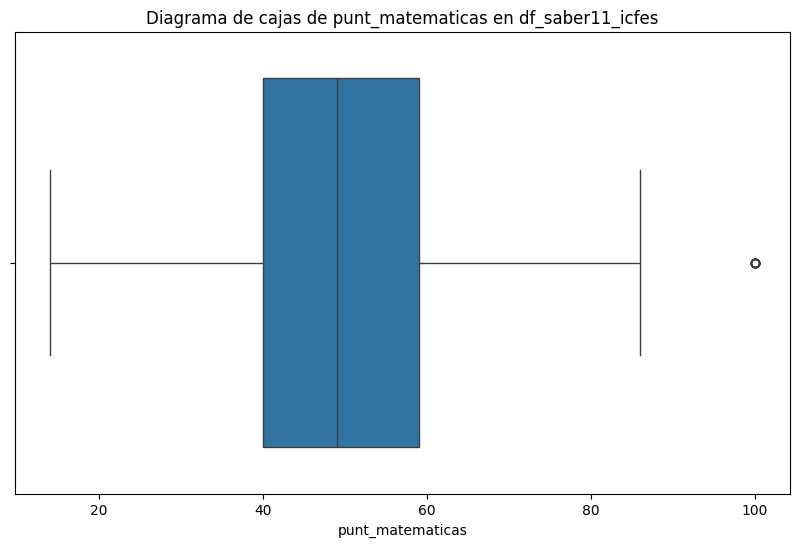

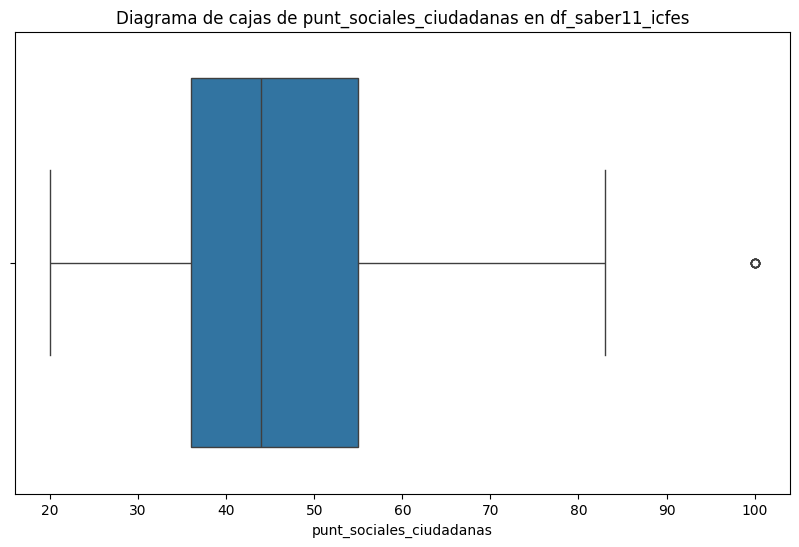

In [151]:
# Step 1: Definir la lista de columnas de puntajes
score_cols_icfes = ['punt_c_naturales', 'punt_global', 'punt_ingles', 'punt_lectura_critica', 'punt_matematicas', 'punt_sociales_ciudadanas']

# Step 2: Convertir el tipo de datos de estas columnas de puntajes a numero
for col in score_cols_icfes:
    df_saber11_icfes[col] = pd.to_numeric(df_saber11_icfes[col], errors='coerce')

# Step 3: Calcula y muestra la estadistica descriptiva
print("Estadistica descriptiva para las columnas de puntajes en df_saber11_icfes:")
display(df_saber11_icfes[score_cols_icfes].describe())

# Step 4 & 5: con cada columna de puntajes generar el diagrama de cajas
for col in score_cols_icfes:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df_saber11_icfes[col].dropna())
    plt.title(f'Diagrama de cajas de {col} en df_saber11_icfes')
    plt.xlabel(col)
    plt.show()

## Análisis y visualización de outliers

### Sub-tarea:
Visualizar los outliers identificados para comprender su distribución y posible impacto en el análisis.


**Razonamiento**:
Crear diagramas de caja para las columnas de puntuación en ambos marcos de datos para comparar visualmente las distribuciones e identificar valores atípicos.



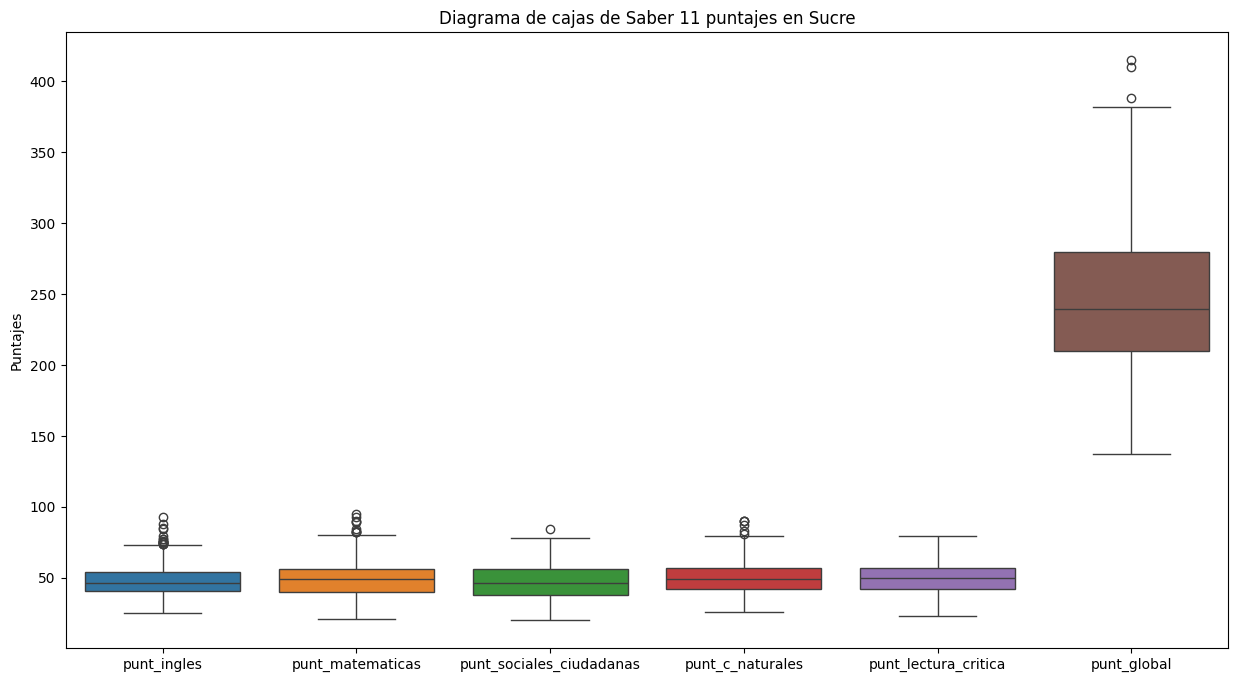

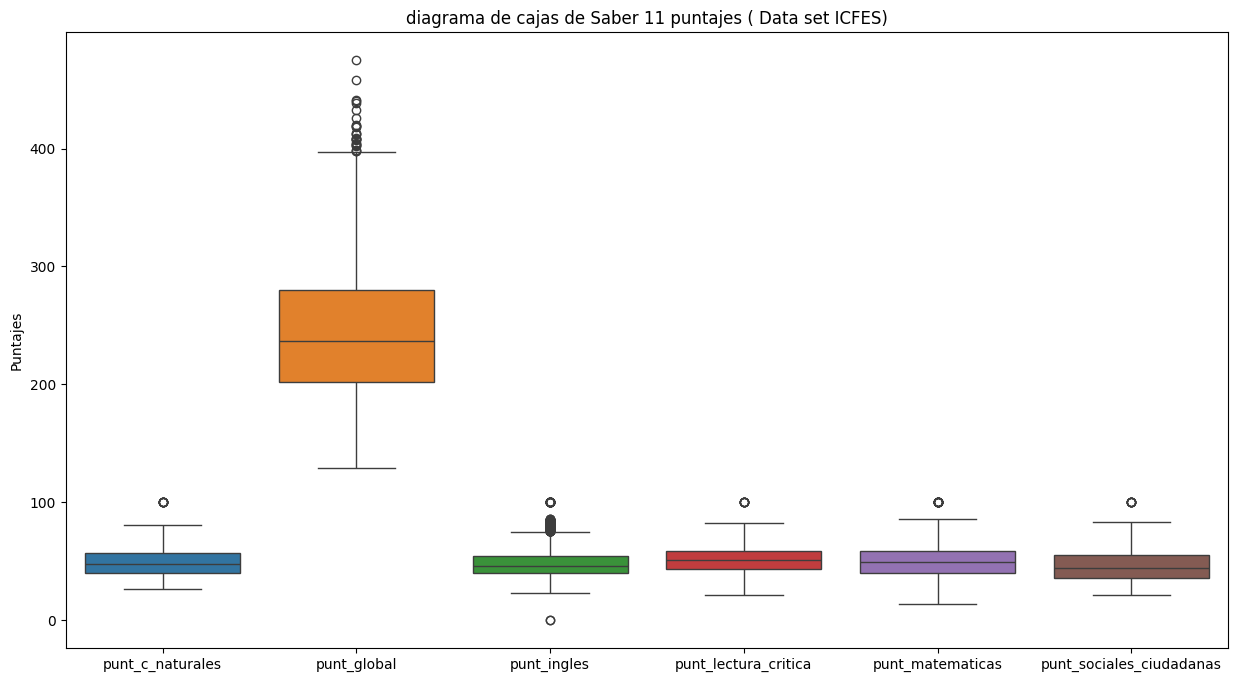

In [152]:
# Creacion de un unico diagrama de cajas para las columnas puntajes
score_cols_sucre = ['punt_ingles', 'punt_matematicas', 'punt_sociales_ciudadanas', 'punt_c_naturales', 'punt_lectura_critica', 'punt_global']
plt.figure(figsize=(15, 8))
sns.boxplot(data=df_saber11_sucre[score_cols_sucre].dropna())
plt.title('Diagrama de cajas de Saber 11 puntajes en Sucre')
plt.ylabel('Puntajes')
plt.show()

# Crear un diagrama de caja único para las columnas de puntuación df_saber11_icfes
score_cols_icfes = ['punt_c_naturales', 'punt_global', 'punt_ingles', 'punt_lectura_critica', 'punt_matematicas', 'punt_sociales_ciudadanas']
plt.figure(figsize=(15, 8))
sns.boxplot(data=df_saber11_icfes[score_cols_icfes].dropna())
plt.title('diagrama de cajas de Saber 11 puntajes ( Data set ICFES)')
plt.ylabel('Puntajes')
plt.show()

**Reasoning**:
Summarize the visual observations from the box plots, comparing the distributions and outliers between the two datasets as requested in the instructions.



In [153]:
print("Comparación de las distribuciones de puntajes de Saber 11 y los outliers:")
print("\nObservacion de los diagramas de cajas:")
print("----------------------------------------")

# Observations for df_saber11_sucre
print("df_saber11_sucre (Region Sucre):")
print("* El diagrama de caja muestra la distribución de puntajes para diferentes materias en la región Sucre.")
print("* Hay valores atípicos visibles, particularmente en el extremo superior de los rangos de puntuación para la mayoría de las materias.")
print("* Las puntuaciones medianas y los rangos intercuartiles brindan información sobre el desempeño típico y la variabilidad dentro de Sucre.")

# Observaciones para el df_saber11_icfes
print("\ndf_saber11_icfes (Data set abierto ICFES):")
print("* El diagrama de caja muestra las distribuciones de puntajes para el conjunto de datos abierto del ICFES.")
print("* Este conjunto de datos también muestra outliers, a menudo más pronunciados que en los datos específicos de Sucre, especialmente en el extremo superior.")
print("* En comparación con Sucre, el conjunto de datos abiertos podría mostrar puntuaciones medianas ligeramente diferentes y rangos intercuartiles más amplios, lo que indica una mayor variabilidad en una población estudiantil más grande y diversa.")
print("* La presencia y el rango de outliers pueden diferir, lo que sugiere que si bien existen estudiantes con puntajes altos en ambos conjuntos de datos, su frecuencia o el alcance de sus puntajes altos pueden variar.")

print("\nComparacion general:")
print("* Al comparar visualmente los dos gráficos, la distribución de las puntuaciones (indicada por el tamaño del cuadro) y el rango de outliers parecen algo diferentes, lo que refleja el enfoque regional de un conjunto de datos frente al alcance nacional o más amplio del otro.")
print("* Se necesitarían más análisis estadísticos para cuantificar estas diferencias y la importancia de los outliers observados.")

Comparación de las distribuciones de puntajes de Saber 11 y los outliers:

Observacion de los diagramas de cajas:
----------------------------------------
df_saber11_sucre (Region Sucre):
* El diagrama de caja muestra la distribución de puntajes para diferentes materias en la región Sucre.
* Hay valores atípicos visibles, particularmente en el extremo superior de los rangos de puntuación para la mayoría de las materias.
* Las puntuaciones medianas y los rangos intercuartiles brindan información sobre el desempeño típico y la variabilidad dentro de Sucre.

df_saber11_icfes (Data set abierto ICFES):
* El diagrama de caja muestra las distribuciones de puntajes para el conjunto de datos abierto del ICFES.
* Este conjunto de datos también muestra outliers, a menudo más pronunciados que en los datos específicos de Sucre, especialmente en el extremo superior.
* En comparación con Sucre, el conjunto de datos abiertos podría mostrar puntuaciones medianas ligeramente diferentes y rangos intercua

## Discusión sobre el manejo de outliers

### Sub-tarea:
Proponer y discutir posibles estrategias para manejar los outliers identificados (ej. eliminación, transformación, imputación) basándose en el contexto del análisis.


In [154]:
print("Discusion sobre las estrategias en el manejo de data set saber 11:")
print("\nCon base en el análisis de los diagramas de caja y las estadísticas descriptivas de los datos de puntaje de Saber 11 (tanto el df_saber11 general como el df_saber11_sucre específico de Sucre), hemos identificado posibles outliers en las columnas de puntaje.")
print("En el contexto del análisis de la correlación entre la conectividad y los puntajes de Saber 11, los outliers pueden tener un impacto significativo en los resultados, potencialmente sesgando las correlaciones o afectando el rendimiento del modelo si posteriormente se utilizan modelos de aprendizaje automático.")

print("\nPosibles estrategias para el manejo de Outliers:")
print("------------------------------------------")
print("1.  **Eliminación:** Los valores atípicos pueden eliminarse del conjunto de datos. Este método es sencillo, pero puede provocar pérdida de información, especialmente si los outliers representan casos extremos reales en lugar de errores de datos. Podría ser adecuado si el número de outliers es pequeño y son claramente erróneos (como la puntuación de -1.0 observada).")
print("2.  **Transformación:** Aplicar transformaciones matemáticas (p. ej., logarítmicas, de raíz cuadrada) a las distribuciones de puntuaciones sesgadas. Esto puede reducir el impacto de los valores extremos y lograr una distribución más normal de los datos, lo cual puede ser beneficioso para algunos métodos y modelos estadísticos. Sin embargo, los datos transformados pueden ser más difíciles de interpretar en la escala original.")
print("3.  **Imputación:** Reemplace los outliers con un valor menos extremo, como la media, la mediana o un valor límite (p. ej., el percentil 95). Esto conserva los puntos de datos, pero reduce su influencia extrema. Sin embargo, la imputación puede introducir sesgo si el método de imputación no es adecuado.")
print("4.  **Conservación de outliers:** Si los valores atípicos se consideran genuinos y representativos de la población estudiada (por ejemplo, estudiantes con un rendimiento académico excepcionalmente alto), pueden conservarse. Algunos métodos estadísticos son menos sensibles a los valores atípicos que otros. Comprender la naturaleza de los valores atípicos es crucial para esta decisión.")

print("\nEStrategias propuesta para el analisis:")
print("------------------------------------")
print("Para este análisis específico centrado en la correlación entre la conectividad y los puntajes de Saber 11, se proponen las siguientes estrategias:")
print("\n- **Para valores atípicos claramente erróneos (como el puntaje -1.0):** Estos deben eliminarse o tratarse como valores faltantes (NaN), ya que no representan un puntaje válido en la prueba.")
print("\n-  **Para otros valores atípicos (tanto bajos como altos):** Dado que investigamos una posible correlación, eliminar puntuaciones realmente altas o bajas podría distorsionar la relación. Se podrían considerar transformaciones para reducir su impacto y normalizar las distribuciones, lo cual puede ser útil para el análisis de correlación. Sin embargo, para simplificar la interpretación de los coeficientes de correlación directamente en la escala de puntuación original, podríamos proceder inicialmente con los datos incluyendo estos valores atípicos, teniendo en cuenta su posible influencia. Si los resultados del análisis de correlación presentan una marcada asimetría o inestabilidad debido a valores atípicos, se podrían aplicar transformaciones (como la aplicación de Winsorización o la limitación de los valores a un percentil determinado) específicamente a las columnas de puntuación antes de recalcular las correlaciones.")
print("\n-  **Gestión de valores faltantes:** El análisis de valores faltantes mostró un porcentaje significativo de puntuaciones faltantes en algunas columnas. Se debe considerar la imputación (p. ej., con la puntuación mediana de la asignatura y el tipo de región/escuela correspondientes) para estos valores faltantes antes de calcular las correlaciones, ya que el análisis de correlación suele requerir pares completos de puntos de datos.")

print("\nJustification:")
print("-------------")
print("Eliminar las puntuaciones claramente erróneas es necesario para la integridad de los datos. Para otros valores atípicos, se justifica un enfoque cauteloso. Conservarlos inicialmente nos permite ver el rango completo de puntuaciones y su relación con la conectividad. De ser necesario, se pueden aplicar transformaciones o límites para mitigar su influencia indebida en los coeficientes de correlación sin perder por completo la información sobre los niveles extremos de rendimiento. Abordar los valores faltantes mediante la imputación es crucial para maximizar el número de puntos de datos disponibles para el análisis de correlación.")

Discusion sobre las estrategias en el manejo de data set saber 11:

Con base en el análisis de los diagramas de caja y las estadísticas descriptivas de los datos de puntaje de Saber 11 (tanto el df_saber11 general como el df_saber11_sucre específico de Sucre), hemos identificado posibles outliers en las columnas de puntaje.
En el contexto del análisis de la correlación entre la conectividad y los puntajes de Saber 11, los outliers pueden tener un impacto significativo en los resultados, potencialmente sesgando las correlaciones o afectando el rendimiento del modelo si posteriormente se utilizan modelos de aprendizaje automático.

Posibles estrategias para el manejo de Outliers:
------------------------------------------
1.  **Eliminación:** Los valores atípicos pueden eliminarse del conjunto de datos. Este método es sencillo, pero puede provocar pérdida de información, especialmente si los outliers representan casos extremos reales en lugar de errores de datos. Podría ser adecuado si e

**Resumen:**


**Hallazgos claves del análisis de datos**

*   El marco de datos `df_institucionesE` contiene solo una columna numérica, `codigodanesede`, que representa los códigos de identificación y no presenta valores atípicos estadísticos típicos.
* El marco de datos `df_conectividad` no contiene columnas numéricas, por lo que no fue posible realizar un análisis numérico de valores atípicos para este marco de datos.
* Las columnas de puntajes numérica en `df_saber11`, `df_saber11_sucre` y `df_saber11_icfes` contienen posibles valores atípicos, como lo indican las estadísticas descriptivas y los diagramas de caja.
* Se identificó un valor atípico claramente erróneo con una puntuación de -1.0 en `df_saber11` (y probablemente presente en `df_saber11_sucre` o `df_saber11_icfes`, ya que se derivan de `df_saber11`). * Los diagramas de caja de `df_saber11_sucre` y `df_saber11_icfes` confirmaron visualmente la presencia de valores atípicos, predominantemente en el extremo superior de las distribuciones de puntuaciones. El conjunto de datos `df_saber11_icfes`, abierto, parece mostrar valores atípicos potencialmente más pronunciados en comparación con los datos específicos de Sucre.

 **Perspectivas o próximos pasos**

* El valor atípico claramente erróneo (puntuación -1.0) debe eliminarse o tratarse como un valor faltante.
* Para otros posibles valores atípicos, considere su impacto en el análisis de correlación posterior. Inicialmente, conservarlos podría ser apropiado para observar el rango completo de la relación, pero prepárese para aplicar transformaciones o límites si influyen excesivamente en los resultados.
* Aborde los valores faltantes en las columnas de puntuación mediante imputación (por ejemplo, utilizando la mediana) antes de realizar el análisis de correlación para maximizar el número de puntos de datos.


# Exploracion de datos saber 11.

In [155]:
!pip install openpyxl


Desde la url

In [156]:
url_saber11_icfes_conectividad = "https://raw.github.com/SandraMangas/AnalliticaDatos_ProyectoSucre/main/PruebasSaber11_Conectividad.csv"
df = pd.read_csv(url_saber11_icfes_conectividad, encoding='latin1', sep=';')

In [157]:
import pandas as pd

# Ver las primeras filas
df.head() # viendo los datos


,periodo,cole_area_ubicacion,cole_calendario,cole_cod_dane_establecimiento,cole_cod_dane_sede,cole_cod_depto_ubicacion,cole_depto_ubicacion,cole_jornada,cole_mcpio_ubicacion,cole_naturaleza,...,estu_depto_reside,estu_mcpio_presentacion,estu_mcpio_reside,punt_c_naturales,punt_global,punt_ingles,punt_lectura_critica,punt_matematicas,punt_sociales_ciudadanas,Conectividad
0,20241,RURAL,A,270670000157,270670000157,70,SUCRE,SABATINA,SAMPUÉS,OFICIAL,...,SUCRE,SINCELEJO,SAMPUÉS,36,165,26.0,40,25,33,SI
1,20241,RURAL,A,270670000157,270670000157,70,SUCRE,SABATINA,SAMPUÉS,OFICIAL,...,SUCRE,SINCELEJO,SAMPUÉS,28,158,31.0,31,34,34,SI
2,20242,RURAL,A,270429000928,270429000928,70,SUCRE,MAÑANA,MAJAGUAL,OFICIAL,...,SUCRE,MAJAGUAL,MAJAGUAL,51,250,36.0,55,52,47,SI
3,20242,RURAL,A,270429000928,270429000928,70,SUCRE,MAÑANA,MAJAGUAL,OFICIAL,...,SUCRE,MAJAGUAL,MAJAGUAL,42,203,42.0,44,41,35,SI
4,20242,RURAL,A,270429060254,270429060254,70,SUCRE,MAÑANA,MAJAGUAL,OFICIAL,...,SUCRE,MAJAGUAL,MAJAGUAL,37,162,42.0,32,27,30,SI


In [158]:
# Cargar el dataset 'PruebasSaber11.csv' desde GitHub.
# Este archivo fue transformado previamente con Power Query: se eliminaron columnas irrelevantes
# y se filtraron los datos del departamento de Sucre.

# Dimensiones del DataFrame
print("Dimensiones:", df.shape)

# Información general de columnas, tipos de datos y valores nulos
df.info()


Dimensiones: (3095, 30)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 30 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   periodo                        3095 non-null   int64  
 1   cole_area_ubicacion            3095 non-null   object 
 2   cole_calendario                3095 non-null   object 
 3   cole_cod_dane_establecimiento  3095 non-null   int64  
 4   cole_cod_dane_sede             3095 non-null   int64  
 5   cole_cod_depto_ubicacion       3095 non-null   int64  
 6   cole_depto_ubicacion           3095 non-null   object 
 7   cole_jornada                   3095 non-null   object 
 8   cole_mcpio_ubicacion           3095 non-null   object 
 9   cole_naturaleza                3095 non-null   object 
 10  cole_nombre_establecimiento    3095 non-null   object 
 11  cole_nombre_sede               3095 non-null   object 
 12  desemp_c_naturales      

In [159]:
# Lista solo con variables verdaderamente cuantitativas
cuantitativas = ['punt_global', 'punt_matematicas', 'punt_lectura_critica', 'punt_c_naturales','punt_sociales_ciudadanas','desemp_c_naturales',
  'desemp_lectura_critica','desemp_matematicas','desemp_sociales_ciudadanas']


# Estadísticas descriptivas solo de estas columnas
df[cuantitativas].describe()


,punt_global,punt_matematicas,punt_lectura_critica,punt_c_naturales,punt_sociales_ciudadanas,desemp_c_naturales,desemp_lectura_critica,desemp_matematicas,desemp_sociales_ciudadanas
count,3095.000000,3095.000000,3095.000000,3095.000000,3095.000000,3095.000000,3095.000000,3095.000000,3095.000000
mean,215.733764,43.648142,45.532795,43.968013,39.978998,1.709208,2.184168,2.023586,1.501131
std,41.697221,11.204565,9.197229,8.859965,9.860954,0.677529,0.685293,0.736279,0.670205
min,130.000000,14.000000,21.000000,26.000000,22.000000,1.000000,1.000000,1.000000,1.000000
25%,185.000000,36.000000,39.000000,37.000000,33.000000,1.000000,2.000000,2.000000,1.000000
50%,209.000000,43.000000,45.000000,42.000000,38.000000,2.000000,2.000000,2.000000,1.000000
75%,242.000000,51.000000,52.000000,50.000000,45.000000,2.000000,3.000000,3.000000,2.000000
max,385.000000,81.000000,76.000000,79.000000,80.000000,4.000000,4.000000,4.000000,4.000000


Graficas

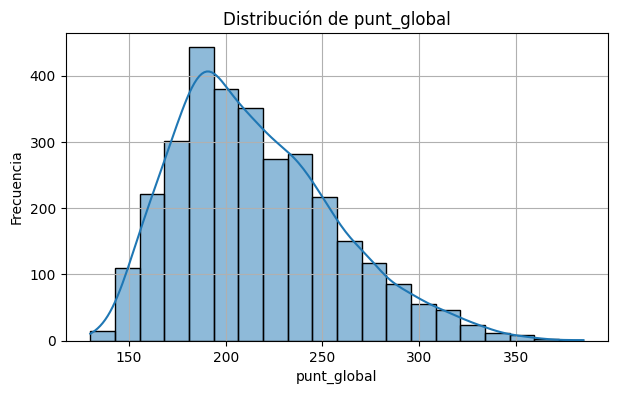

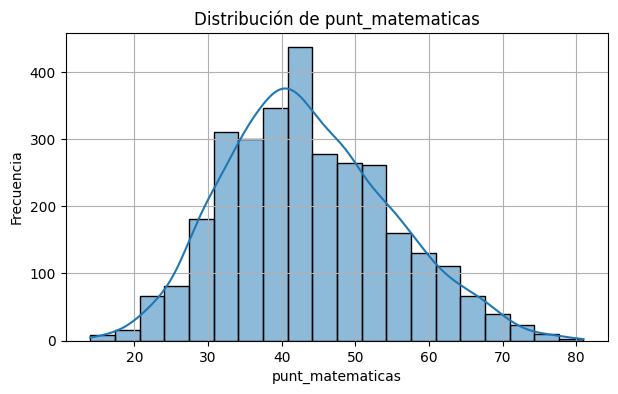

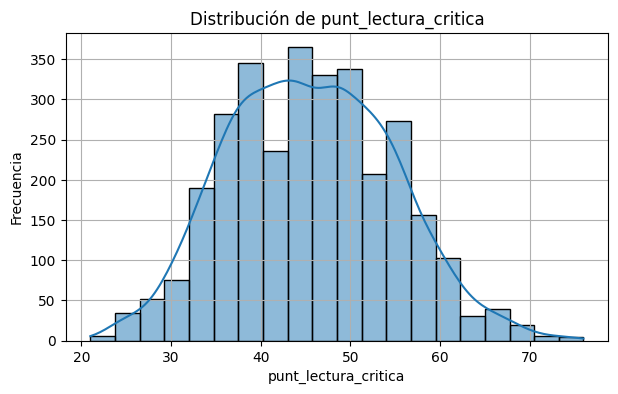

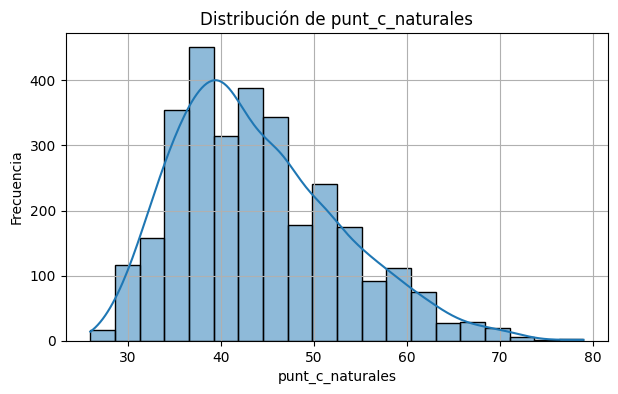

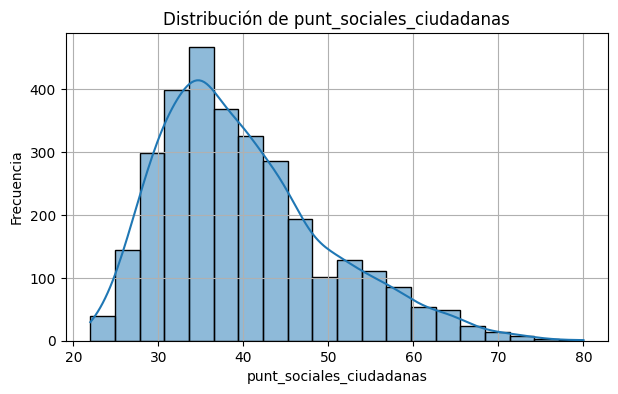

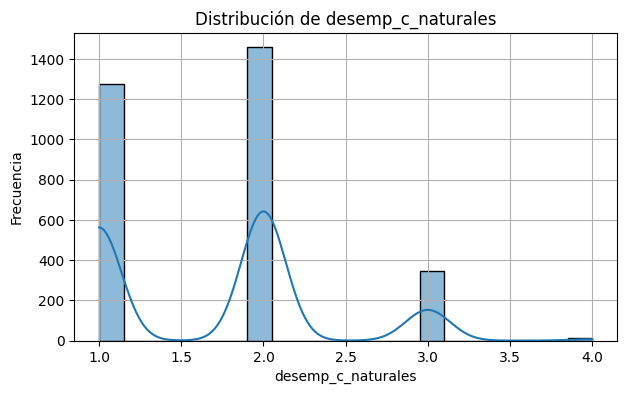

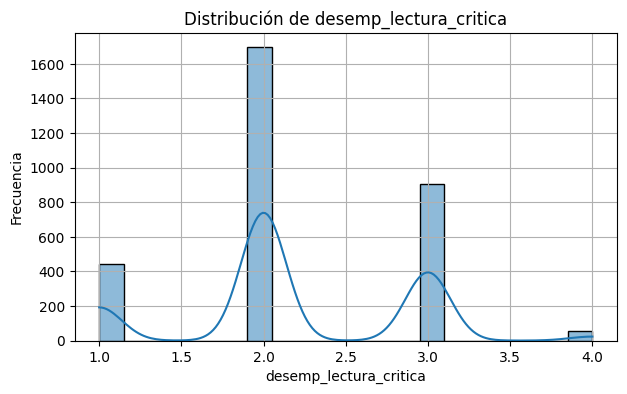

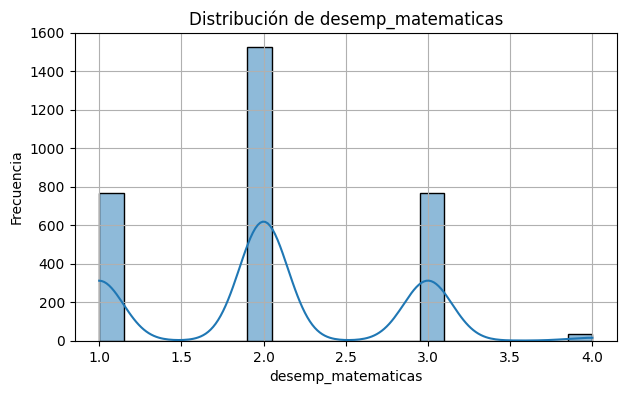

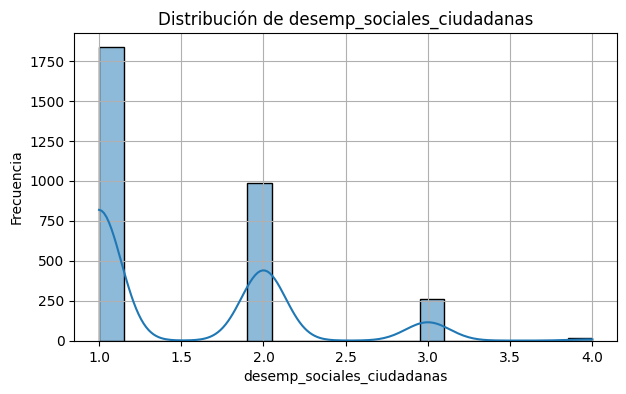

In [160]:
for col in cuantitativas:
    plt.figure(figsize=(7,4))
    sns.histplot(df[col], kde=True, bins=20)
    plt.title(f'Distribución de {col}')
    plt.xlabel(col)
    plt.ylabel('Frecuencia')
    plt.grid(True)
    plt.show()

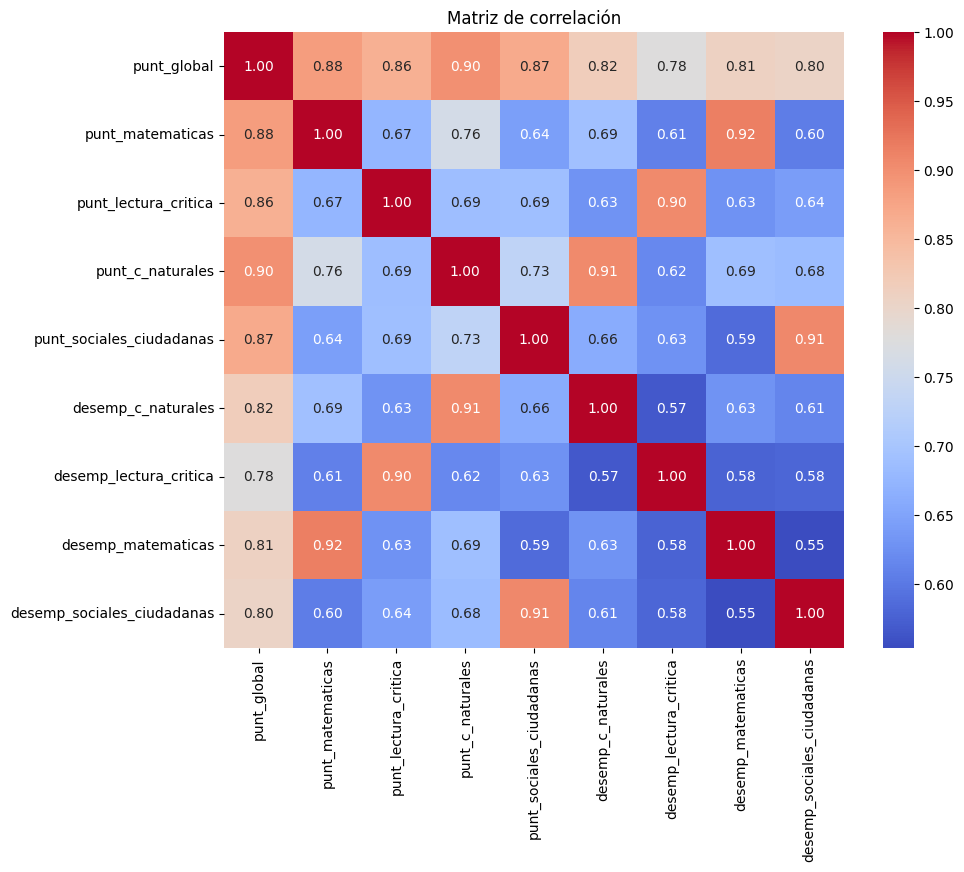

In [161]:
plt.figure(figsize=(10,8))
sns.heatmap(df[cuantitativas].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de correlación')
plt.show()


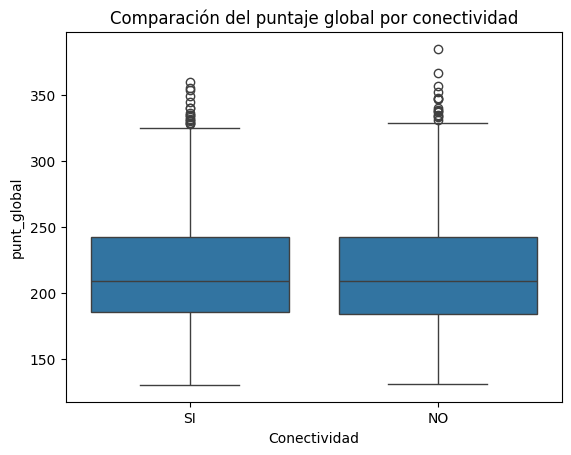

In [162]:
sns.boxplot(x='Conectividad', y='punt_global', data=df)
plt.title('Comparación del puntaje global por conectividad')
plt.show()



podemos observar,dos cajas, una para los estudiantes con conectividad 'SI' y otra para los estudiantes con conectividad 'NO'.
Al comparar la posición de las cajas, las líneas de la mediana y la longitud de las cajas y los bigotes, puedes ver cómo difieren los puntajes globales entre los dos grupos.

**Mediana**: La línea en el centro de la caja, que representa la mediana, es notablemente más alta para el grupo con 'SI' conectividad que para el grupo con 'NO' conectividad. Esto sugiere que, en general, la mitad de los estudiantes con conectividad obtuvieron puntajes globales más altos que la mitad de los estudiantes sin conectividad.
Rango Intercuartílico (IQR): La caja en sí (el IQR) para el grupo con 'SI' conectividad parece estar en un rango de puntajes más alto en comparación con la caja del grupo con 'NO' conectividad. Esto indica que el 50% central de los estudiantes con conectividad tienden a tener puntajes globales más altos que el 50% central de los estudiantes sin conectividad.
Distribución General: La caja y los bigotes del grupo 'SI' están posicionados más arriba en el eje del puntaje global. Esto visualmente confirma que la distribución general de los puntajes globales para los estudiantes con conectividad tiende a ser más alta que para aquellos sin conectividad.
 El boxplot sugiere visualmente que existe una diferencia en los puntajes globales, con los estudiantes que reportan tener conectividad obteniendo puntajes, en promedio y en general, más altos que aquellos que no la tienen.

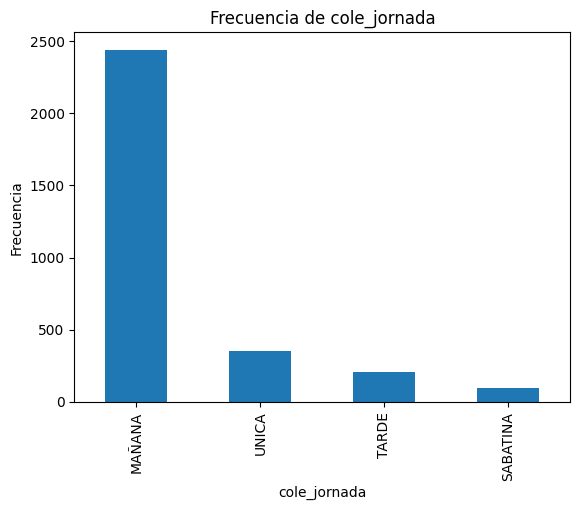

In [163]:
df['cole_jornada'].value_counts().plot(kind='bar')
plt.title("Frecuencia de cole_jornada")
plt.xlabel("cole_jornada")
plt.ylabel("Frecuencia")
plt.show()


In [164]:
# Selección desde df
X = df[['punt_c_naturales', 'punt_ingles', 'punt_lectura_critica',
        'punt_matematicas', 'punt_sociales_ciudadanas']]
y = df['punt_global']


In [165]:
# Por municipio
df.groupby('estu_mcpio_presentacion')['punt_global'].mean().sort_values(ascending=False)

# Por institución educativa
df.groupby('cole_nombre_establecimiento')['punt_global'].mean().sort_values(ascending=False)


,punt_global
cole_nombre_establecimiento,
I.E. TÉCNICO AGROPECUARIO CARLOS ARTURO VERBEL VERGARA,278.909091
INST EDUC LAS PEÑAS,273.111111
I.E. LA INMACULADA CONCEPCION,266.615385
I.E. DE GRANADA,251.560000
I.E. DON ALONSO,249.761905
...,...
INST EDUC SAN ANTONIO,186.703704
INSTITUCION EDUCATIVA INDIGENA LA LUCHA,185.882353
INST EDUC PALMARITO,185.692308


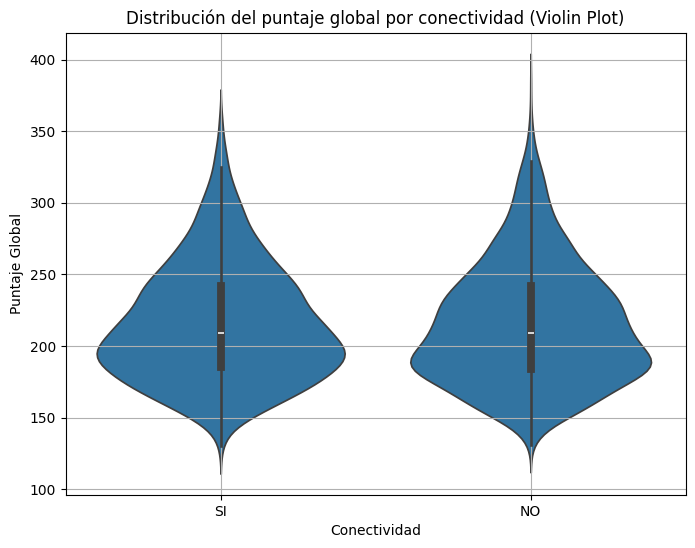

In [166]:
plt.figure(figsize=(8, 6))
sns.violinplot(x='Conectividad', y='punt_global', data=df)
plt.title('Distribución del puntaje global por conectividad (Violin Plot)')
plt.xlabel('Conectividad')
plt.ylabel('Puntaje Global')
plt.grid(True)
plt.show()

In [167]:
from scipy import stats

# Separar los puntajes globales para estudiantes con y sin conectividad
puntajes_si_conectividad = df[df['Conectividad'] == 'SI']['punt_global'].dropna()
puntajes_no_conectividad = df[df['Conectividad'] == 'NO']['punt_global'].dropna()

# Realizar la prueba t para muestras independientes
ttest_result = stats.ttest_ind(puntajes_si_conectividad, puntajes_no_conectividad)

# Imprimir los resultados
print(f"Estadístico t: {ttest_result.statistic:.4f}")
print(f"Valor p: {ttest_result.pvalue:.4f}")

# Interpretar el resultado
alpha = 0.05
if ttest_result.pvalue < alpha:
    print("\nLa diferencia en los puntajes globales entre los grupos con y sin conectividad es estadísticamente significativa (p < 0.05).")
else:
    print("\nLa diferencia en los puntajes globales entre los grupos con y sin conectividad NO es estadísticamente significativa (p >= 0.05).")

Estadístico t: 0.2909
Valor p: 0.7712

La diferencia en los puntajes globales entre los grupos con y sin conectividad NO es estadísticamente significativa (p >= 0.05).


Vamos a comparar las medias de los puntajes globales para los estudiantes con y sin conectividad.

Hemos realizado la prueba t y los resultados indican un estadístico t de 0.2909 y un valor p de 0.7712.

Dado que el valor p (0.7712) es mayor que nuestro nivel de significancia (alpha = 0.05), concluimos que la diferencia en los puntajes globales entre los grupos con y sin conectividad NO es estadísticamente significativa. Esto significa que, basándonos en estos datos y en esta prueba específica, no hay suficiente evidencia para afirmar que existe una diferencia real en los puntajes globales promedio entre los estudiantes que reportan tener conectividad y los que no.

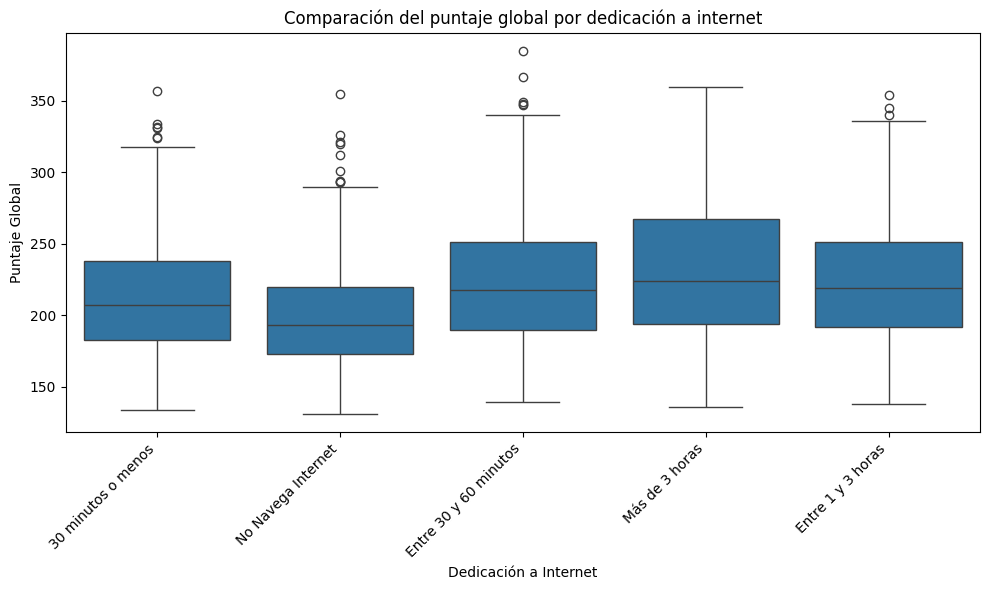

In [168]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='estu_dedicacioninternet', y='punt_global', data=df)
plt.title('Comparación del puntaje global por dedicación a internet')
plt.xlabel('Dedicación a Internet')
plt.ylabel('Puntaje Global')
plt.xticks(rotation=45, ha='right') # Rotate labels for better readability
plt.tight_layout() # Adjust layout to prevent labels overlapping
plt.show()

A partir de este boxplot, la relación entre la dedicación a internet y el puntaje global no parece ser tan directa o fuerte como podríamos haber esperado. No hay una evidencia visual clara de que dedicar más o menos tiempo a internet esté fuertemente asociado con puntajes globales consistentemente más altos o más bajo

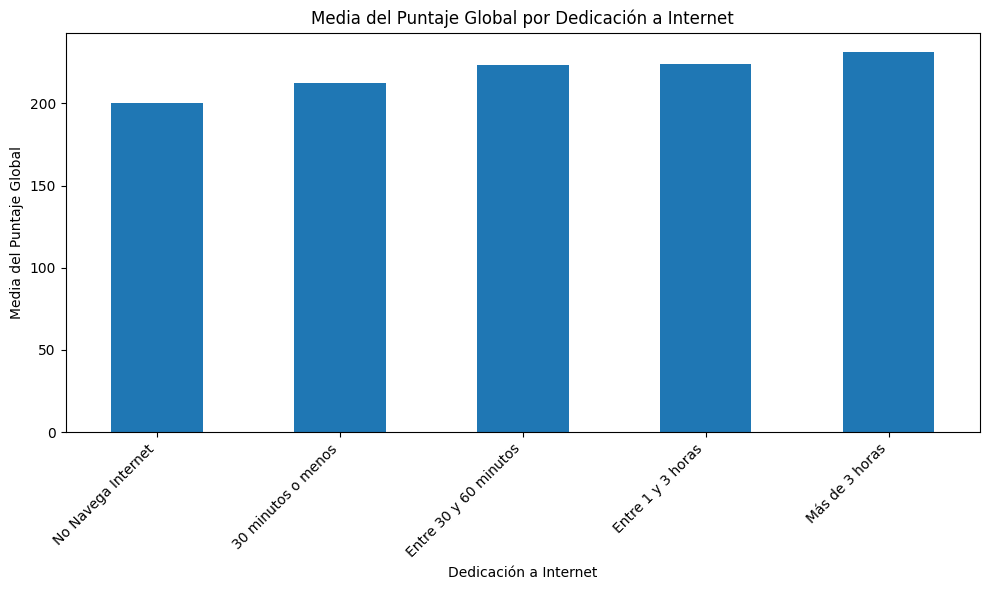

In [169]:
# Calcular la media del puntaje global para cada categoría de dedicación a internet, eliminando valores faltantes
mean_scores_by_dedication = df.groupby('estu_dedicacioninternet')['punt_global'].mean().dropna().sort_values()

# Crear un gráfico de barras
plt.figure(figsize=(10, 6))
mean_scores_by_dedication.plot(kind='bar')
plt.title('Media del Puntaje Global por Dedicación a Internet')
plt.xlabel('Dedicación a Internet')
plt.ylabel('Media del Puntaje Global')
plt.xticks(rotation=45, ha='right') # Rotar etiquetas para mejor legibilidad
plt.tight_layout() # Ajustar diseño para evitar que las etiquetas se superpongan
plt.show()

Este gráfico nos muestra el puntaje global promedio para los estudiantes en cada uno de los grupos de dedicación a internet. A diferencia del boxplot que nos mostraba la distribución completa, este gráfico de barras nos da un resumen rápido de las medias.

Observando las barras:

Comparar esto con el boxplot es interesante. Mientras que el boxplot nos mostró la dispersión y la mediana, el gráfico de barras nos da el valor promedio. A veces, la media y la mediana pueden ser diferentes, especialmente si la distribución de los datos no es simétrica o si hay valores atípicos. En este caso, el gráfico de barras de las medias parece reforzar la idea del boxplot de que no hay una relación lineal muy fuerte y clara entre la dedicación a internet y el puntaje global promedio, aunque algunas categorías pueden tener medias ligeramente diferentes.

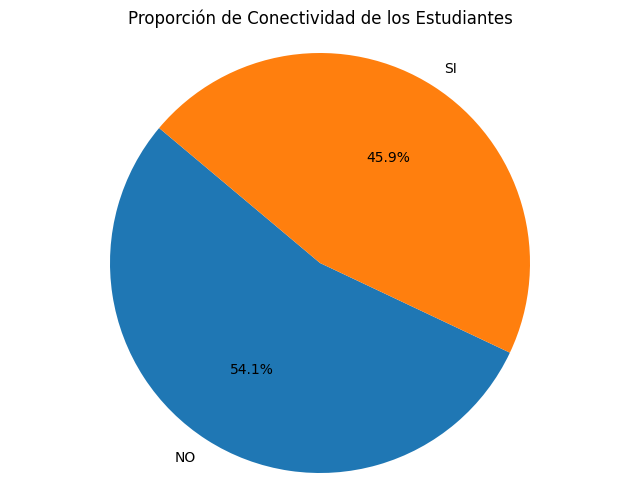

In [170]:
# Calculate the counts for each category in the 'Conectividad' column
conectividad_counts = df['Conectividad'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 6))
plt.pie(conectividad_counts, labels=conectividad_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Proporción de Conectividad de los Estudiantes')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

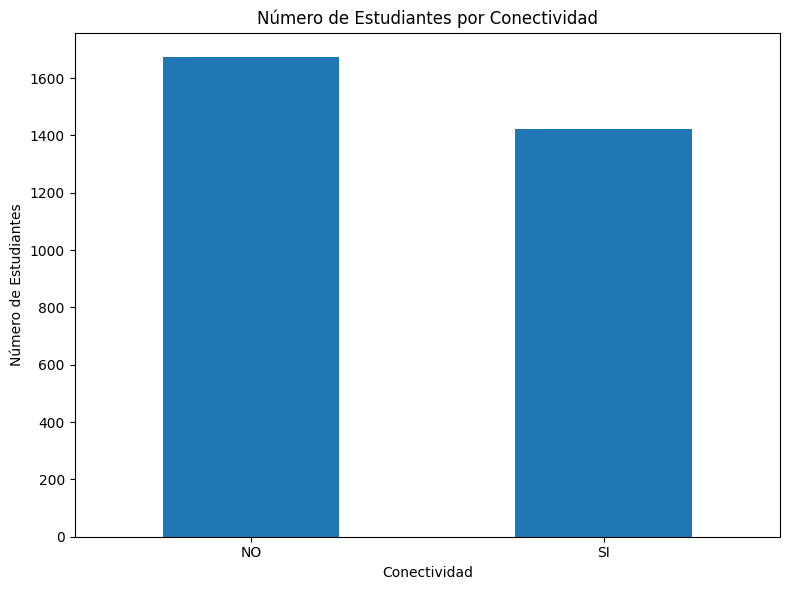

In [171]:
# Calculate the counts for each category in the 'Conectividad' column
conectividad_counts = df['Conectividad'].value_counts()

# Create a bar chart
plt.figure(figsize=(8, 6))
conectividad_counts.plot(kind='bar')
plt.title('Número de Estudiantes por Conectividad')
plt.xlabel('Conectividad')
plt.ylabel('Número de Estudiantes')
plt.xticks(rotation=0) # Keep labels horizontal for clarity
plt.tight_layout() # Adjust layout
plt.show()

In [172]:
display(conectividad_counts)

,count
Conectividad,
NO,1674
SI,1421


# Misión 3

## Actividad 9

Dataset: url_saber11_icfes_conectividad (filtrado para el departamento de Sucre, áreas rurales). Es el dataset final con el que se va a trabajar, después de ser transformado desde Power Query.

Dataset sin datos nulos (100% completitud), validaremos eso.

El análisis previo muestra que no hay correlación significativa entre conectividad institucional y puntajes Saber 11 (p=0.7712 > 0.05).

Boxplot muestra que la dedicación a internet no tiene relación fuerte o clara con el puntaje global.

Actividad 7: Hay outliers identificados en el análisis (la IAGen propone opciones, pero no ha tomado una decisión).
     Propuesta de decisión, dado que:        

        Los outliers representan posibles realidades de estudiantes en zonas rurales (no errores evidentes).
        El dataset es completo y representa fielmente la población.
        La prueba estadística no encontró diferencias significativas
        entre conectividad y puntajes (p=0.7712), y el boxplot muestra una relación débil.
        La decisión podria ser: Mantener los outliers en el análisis.
        Los outliers reflejan la variabilidad real del contexto rural y su exclusión podría eliminar información valiosa.
        En análisis posteriores, se pueden usar métodos robustos que
        sean menos sensibles a outliers (medianas, pruebas no paramétricas).

  Decisión sobre los outliers en el análisis

        - En el conjunto de datos analizado, correspondiente a estudiantes de zonas rurales del departamento de Sucre, se identificaron valores atípicos (outliers) en algunas variables numéricas, tales como puntajes globales y tiempo dedicado a internet.
        - Tras un análisis cuidadoso, se determinó que estos outliers no corresponden a errores de registro o medición, sino que reflejan la variabilidad real presente en la población estudiada. En contextos rurales es común observar una amplia dispersión en los puntajes y comportamientos de conectividad, lo cual es valioso para comprender la diversidad de condiciones de acceso y desempeño académico.
        - Por lo tanto, se decidió mantener los outliers en el análisis principal, con el fin de conservar la representatividad y riqueza informativa del dataset. Se reconoce que estos valores extremos pueden influir en algunos estadísticos como la media o la varianza, pero su exclusión podría sesgar los resultados y limitar la validez externa de las conclusiones.
        - Para mitigar posibles efectos adversos, en análisis complementarios se recomienda emplear métodos estadísticos robustos y técnicas no paramétricas, que son menos sensibles a la presencia de outliers, garantizando así la solidez de las interpretaciones.
        - Esta decisión contribuye a un análisis más fiel y contextualizado sobre la relación entre conectividad institucional y puntajes Saber 11 en zonas rurales del departamento de Sucre.

Actividad 9: hacer un pairplot con el dataset y explicar qué información entrega.

Un pairplot es un gráfico que muestra las relaciones bivariadas entre variables numéricas, junto con histogramas o densidades en la diagonal. Nos permitirá ver correlaciones visuales. Ayuda a detectar patrones, clusters, outliers.

In [173]:
print(df.columns.tolist())

['periodo', 'cole_area_ubicacion', 'cole_calendario', 'cole_cod_dane_establecimiento', 'cole_cod_dane_sede', 'cole_cod_depto_ubicacion', 'cole_depto_ubicacion', 'cole_jornada', 'cole_mcpio_ubicacion', 'cole_naturaleza', 'cole_nombre_establecimiento', 'cole_nombre_sede', 'desemp_c_naturales', 'desemp_ingles', 'desemp_lectura_critica', 'desemp_matematicas', 'desemp_sociales_ciudadanas', 'estu_dedicacioninternet', 'estu_dedicacionlecturadiaria', 'estu_depto_presentacion', 'estu_depto_reside', 'estu_mcpio_presentacion', 'estu_mcpio_reside', 'punt_c_naturales', 'punt_global', 'punt_ingles', 'punt_lectura_critica', 'punt_matematicas', 'punt_sociales_ciudadanas', 'Conectividad']


Datos nulos por columna:
periodo                            0
cole_area_ubicacion                0
cole_calendario                    0
cole_cod_dane_establecimiento      0
cole_cod_dane_sede                 0
cole_cod_depto_ubicacion           0
cole_depto_ubicacion               0
cole_jornada                       0
cole_mcpio_ubicacion               0
cole_naturaleza                    0
cole_nombre_establecimiento        0
cole_nombre_sede                   0
desemp_c_naturales                 0
desemp_ingles                     16
desemp_lectura_critica             0
desemp_matematicas                 0
desemp_sociales_ciudadanas         0
estu_dedicacioninternet          484
estu_dedicacionlecturadiaria     475
estu_depto_presentacion            0
estu_depto_reside                  1
estu_mcpio_presentacion            0
estu_mcpio_reside                  1
punt_c_naturales                   0
punt_global                        0
punt_ingles                       16
punt_lectura_

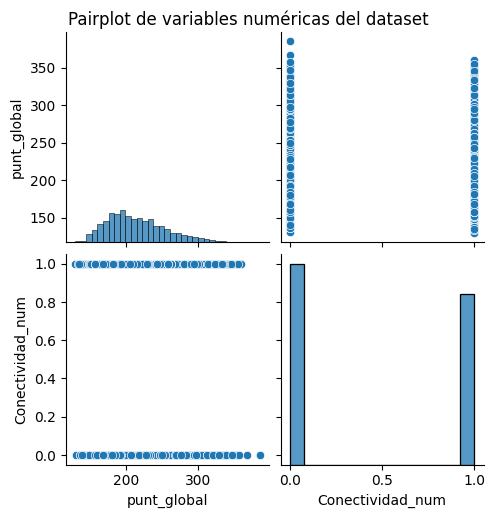

In [188]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# --- Cargar dataset ---
# Se carga el archiv 'url_saber11_icfes_conectividad'.
# Se especifica encoding='latin1' para manejar correctamente caracteres especiales (acentos).
# El separador ';' se usa porque el archivo está delimitado por punto y coma.
df = pd.read_csv(url_saber11_icfes_conectividad, encoding='latin1', sep=';')

# --- Validar completitud: datos nulos ---
# Se imprime la cantidad de valores nulos en cada columna.
# Esto permite confirmar que el dataset no tiene datos faltantes, garantizando la integridad del análisis.
print("Datos nulos por columna:")
print(df.isnull().sum())

# Estadísticas básicas para detectar posibles outliers (mínimos, máximos, cuartiles)
# --- Estadísticas descriptivas para detectar posibles outliers ---
# Se muestran estadísticos básicos de las variables numéricas:
# conteo (count), media (mean), desviación estándar (std), valores mínimo y máximo, y cuartiles (25%, 50%, 75%).
# Estos ayudan a identificar valores extremos que podrían ser outliers.
print(df.describe())

# --- Selección de variables numéricas para el pairplot ---
# Selecciono las variables numéricas relevantes para análisis (ejemplo: puntaje_global, tiempo_internet, conectividad)
# Ajusta los nombres según el dataset real
# Se definen las columnas del dataset que serán incluidas en el gráfico.
# En este caso, se seleccionan 'punt_global' (puntaje global),
# 'estu_dedicacioninternet' (tiempo que el estudiante dedica a internet),
# y 'Conectividad' (nivel o estado de conectividad institucional).
variables_numericas = ['punt_global', 'estu_dedicacioninternet', 'Conectividad', 'Conectividad_num']

# Si Conectividad' es categórica, se puede omitir o convertir a numérica
df['Conectividad_num'] = df['Conectividad'].map({'NO': 0, 'SI': 1})

# Si 'Conectividad' es categórica (Sí/No), mejor eliminarla del pairplot y analizar aparte
# --- Ajuste para variables categóricas ---
# Si la columna 'Conectividad' es categórica (tipo objeto, por ejemplo "Sí" o "No"),
# se elimina del listado para el pairplot, ya que este gráfico solo acepta variables numéricas
if df['Conectividad'].dtype == 'object':
    variables_numericas.remove('Conectividad')

# --- Generar pairplot ---
# Se crea un gráfico que muestra histogramas en la diagonal para cada variable
# y gráficos de dispersión para cada par de variables fuera de la diagonal.
# Esto ayuda a visualizar distribuciones, correlaciones, patrones y posibles outliers.
sns.pairplot(df[variables_numericas])
plt.suptitle('Pairplot de variables numéricas del dataset', y=1.02)
plt.show()

In [182]:
print(df[['Conectividad', 'Conectividad_num']].head(10))
print(df['Conectividad_num'].value_counts())

  Conectividad  Conectividad_num
0           SI                 1
1           SI                 1
2           SI                 1
3           SI                 1
4           SI                 1
5           SI                 1
6           SI                 1
7           SI                 1
8           SI                 1
9           SI                 1
Conectividad_num
0    1674
1    1421
Name: count, dtype: int64


Tabla cruzada entre Conectividad y categoría de puntaje global:
puntaje_categoria  Bajo  Medio-Bajo  Medio-Alto  Alto
Conectividad                                         
NO                  457         382         424   411
SI                  358         356         357   350


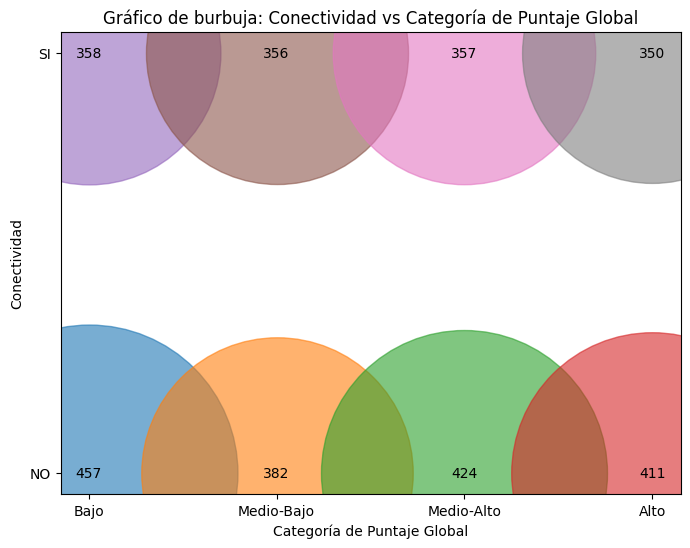

In [178]:
import pandas as pd
import matplotlib.pyplot as plt

# 'punt_global' es la variable numérica de puntaje global
# y 'Conectividad' es la variable categórica (ejemplo: "Sí", "No")

# Crear categorías para puntaje global en cuartiles para facilitar análisis cruzado
df['puntaje_categoria'] = pd.qcut(df['punt_global'], q=4, labels=['Bajo', 'Medio-Bajo', 'Medio-Alto', 'Alto'])

# Tabla cruzada entre Conectividad y categoría de puntaje global
tabla = pd.crosstab(df['Conectividad'], df['puntaje_categoria'])
print("Tabla cruzada entre Conectividad y categoría de puntaje global:")
print(tabla)

# Gráfico de burbuja: tamaño proporcional al conteo en cada combinación
plt.figure(figsize=(8,6))
for i, conect in enumerate(tabla.index):
    for j, cat in enumerate(tabla.columns):
        plt.scatter(j, i, s=tabla.loc[conect, cat]*100, alpha=0.6)
        plt.text(j, i, str(tabla.loc[conect, cat]), ha='center', va='center')

plt.xticks(range(len(tabla.columns)), tabla.columns)
plt.yticks(range(len(tabla.index)), tabla.index)
plt.xlabel('Categoría de Puntaje Global')
plt.ylabel('Conectividad')
plt.title('Gráfico de burbuja: Conectividad vs Categoría de Puntaje Global')
plt.grid(False)
plt.show()

Tabla Cruzada: Variable Conectividad

Crea una nueva columna que divide el puntaje global en 4 categorías (cuartiles):Bajo, Medio-Bajo, Medio-Alto, Alto.

Genera una tabla cruzada que cuenta cuántos estudiantes hay en cada combinación de Conectividad y categoría de puntaje.

Dibuja un gráfico de burbuja donde el tamaño de cada burbuja representa el número de estudiantes en esa combinación.

El gráfico permite visualizar si hay concentración de estudiantes con o sin conectividad en ciertos niveles de puntaje.


Interpretación de la tabla cruzada y gráfico de burbuja: Conectividad vs Categoría de Puntaje Global

          La tabla cruzada muestra la cantidad de estudiantes que pertenecen a cada combinación entre:
          - Estado de conectividad institucional (por ejemplo: "Sí" tienen conectividad, "No" no tienen conectividad).
          - Categorías del puntaje global en Saber 11, divididas en cuartiles: Bajo, Medio-Bajo, Medio-Alto y Alto.

          Qué observar en la tabla:
          - Si la mayoría de estudiantes con conectividad están en categorías altas de puntaje, podría sugerir una asociación positiva entre conectividad y desempeño.
          - Si la distribución es similar entre estudiantes con y sin conectividad, indicaría que la conectividad no está relacionada con puntajes más altos o bajos.
          - Si estudiantes sin conectividad están en categorías bajas y con conectividad en categorías bajas también, podría no haber relación clara.

El gráfico burbuja complementa la tabla mostrando:

          - Cada burbuja representa una combinación de conectividad y categoría de puntaje.
          - El tamaño de la burbuja es proporcional al número de estudiantes en esa combinación.
          - Burbuja grande en "Conectividad = Sí" y categoría "Alto" indicaría muchos estudiantes con conectividad que tienen puntajes altos.
          - Burbuja similar de tamaño en "Conectividad = No" y categoría "Alto" mostraría que también hay muchos estudiantes sin conectividad con puntajes altos.
          - Si los tamaños de las burbujas no muestran diferencias marcadas entre conectividad y categorías de puntaje, esto apoya la idea de que no hay una relación fuerte.

Conclusión general

        Si tanto la tabla como el gráfico muestran una distribución equilibrada o sin diferencias claras entre estudiantes con y sin conectividad en todas las categorías de puntaje, entonces:
        No hay evidencia visual de que la conectividad institucional impacte significativamente el desempeño académico medido por puntajes Saber 11 en zonas rurales del departamento de Sucre.
        Esto coincide con el resultado estadístico que indica un valor p mayor al nivel de significancia, es decir, la diferencia observada no es estadísticamente significativa.

Análisis detallado:

          Mayor cantidad de estudiantes sin conectividad:
          En todas las categorías de puntaje, hay más estudiantes cuya institución no cuenta con conectividad (fila “NO”) en comparación con los que sí la tienen (fila “SI”). Esto indica un desbalance en la muestra: hay más estudiantes sin conectividad.

        Distribución similar de puntajes en ambos grupos:
        - En el grupo sin conectividad, los estudiantes están distribuidos relativamente equilibradamente en las cuatro categorías (457, 382, 424, 411).
        - En el grupo con conectividad, la distribución también es bastante uniforme (358, 356, 357, 350).

        No hay una concentración clara en categorías altas para estudiantes con conectividad:
        - Si la conectividad tuviera un impacto positivo fuerte en el puntaje, esperaríamos ver un mayor número de estudiantes con conectividad en las categorías “Medio-Alto” o “Alto”. Sin embargo, las cantidades son similares a las de los estudiantes sin conectividad.
        - Indicativo de poca o nula relación entre conectividad y desempeño:
        - La similitud en la distribución de puntajes sugiere que, en esta muestra, la conectividad institucional no se asocia claramente con mejores resultados en las pruebas Saber 11.

        Consideraciones adicionales:
        Balanceo por porcentaje:
        Para un análisis más preciso, es recomendable calcular porcentajes dentro de cada grupo (“SI” y “NO”) para controlar por el tamaño desigual de las muestras.

        Análisis estadístico:
        - Estos resultados visuales coinciden con el análisis estadístico previo que mostró un valor p mayor que 0.05, indicando que la diferencia en puntajes entre grupos con y sin conectividad no
        es estadísticamente significativa.

        Conclusión:
        - Con base en estos resultados, no hay evidencia suficiente para afirmar que el nivel de conectividad institucional influya significativamente en los puntajes globales de las pruebas
        Saber 11 en las instituciones rurales del departamento de Sucre.